# ***Projet 09 - Etude de marché - Préparation des données - SECOND RUN***


---
## Partie 1 - Importation - Préparation

### 1. Import des librairies (ok)
---

In [1]:
# Mes imports de lib de base
import pandas as pd # Pour travail avec les df
import numpy as np # Tout ce qui est fct math avec numpy, tjs utile

# Pour les graphiques
import matplotlib.pyplot as plt # Graphes avec matplotlib
import seaborn as sns # Graphes avec seaborn
sns.set_style('darkgrid', {'grid.color': '.5', 'grid.linestyle': ':'}) # Défini un fond de graphe que ce soit pour sns ou plt

# Pour les stats et autre
import scipy.stats as stats # Pour des stats avec scipy
import statsmodels.api as sm # Pour des régressions linéaires ou autre

# Pour le clustering et PCA
import sklearn as sk
import scipy as sp
# import pca as pca
from sklearn.cluster import KMeans # Clustering avec KMeans
from sklearn.decomposition import PCA # Pour calcul des composantes principales


### 2. Infos sur les fichiers (df) - Préparation
---

#### *2.1. Disponibilité*

In [2]:
# On prendra les données de ce df comme base à laquelle on ajoutera d'autres données
# Source : OCR

In [3]:
# Import du csv dispo alimentaire par pays en 2017
# On part du principe que ces datas sont 'safe' (source : FAO) et qu'il n'y a pas de doublons dans les données, ce qui nous éviteras de les tester
data_dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
data_dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176595,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2899,Miscellanees,2017,2017,Milliers de tonnes,19.00,S,Données standardisées
176596,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2899,Miscellanees,2017,2017,kg,1.33,Fc,Donnée calculée
176597,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2899,Miscellanees,2017,2017,Kcal/personne/jour,1.00,Fc,Donnée calculée
176598,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2899,Miscellanees,2017,2017,g/personne/jour,0.04,Fc,Donnée calculée


In [4]:
# Taille du dataset
data_dispo_alim.shape

(176600, 14)

In [5]:
# Infos sur le dataset
# On voit qu'il n'y à pas de manquants
print('Infos sur le dataset :')
print(data_dispo_alim.info())
print('')
print('Manquants sur le dataset :')
print(data_dispo_alim.isna().sum())

Infos sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dt

In [6]:
# Describe sur le dataset
# Ce dataset est sur l'année 2017, donc à voir avec les autres data comment les caler
# Note : On a 174 pays
data_dispo_alim.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,176600,176600,176600.000000,176600,176600.000000,176600,176600.000000,176600,176600.0,176600.0,176600,176600.000000,176600,176600
unique,1,1,NaN,174,NaN,17,NaN,98,NaN,NaN,4,NaN,2,2
top,FBS,Nouveaux Bilans Alimentaire,NaN,Tchad,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,176600,176600,NaN,1416,NaN,15905,NaN,2593,NaN,NaN,118487,NaN,118487,118487
mean,NaN,NaN,125.474740,NaN,3810.052894,NaN,2628.778545,NaN,2017.0,2017.0,NaN,210.554918,NaN,NaN
std,NaN,NaN,72.941699,NaN,2211.790089,NaN,91.993247,NaN,0.0,0.0,NaN,4762.047787,NaN,NaN
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-10388.000000,NaN,NaN
25%,NaN,NaN,63.000000,NaN,684.000000,NaN,2556.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,120.000000,NaN,5142.000000,NaN,2612.000000,NaN,2017.0,2017.0,NaN,0.120000,NaN,NaN
75%,NaN,NaN,188.000000,NaN,5301.000000,NaN,2732.000000,NaN,2017.0,2017.0,NaN,8.462500,NaN,NaN


In [7]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_dispo_alim.columns)
# On défini les valeurs de remplacement (sera identique pour le df population)
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_dispo_alim = data_dispo_alim.rename(columns = replace_dict)
data_dispo_alim.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [8]:
# Nombre de pays présents dans le df_dispo
len(data_dispo_alim['zone'].unique())

174

##### *2.1.1. Ajustement nom pays*

In [9]:
# On regroupe les différents états de la Chine sous le même nom
data_dispo_alim['zone'] = data_dispo_alim['zone'].replace({'Chine - RAS de Hong-Kong' : 'Chine',
                                                           'Chine - RAS de Macao' : 'Chine',
                                                           'Chine, continentale' : 'Chine',
                                                           'Chine, Taiwan Province de' : 'Chine'}).copy()

##### *2.1.2. Calcul des totaux par pays*

In [10]:
# Equation du P4 pour vérif certaines choses au niveau de la dipo alim

# Production + Importation - Exportation + Variation
# = Dispo =
# Aliments animaux + Autres utilisations + Nourriture + Pertes + Semence + Traitement


In [11]:
# gb sur zone et item pour avoir la somme de chaque item par zone
temp_total = data_dispo_alim.groupby(['zone', 'item']).agg({'value' : 'sum'}).reset_index()
temp_total

,zone,item,value
0,Afghanistan,Aliments pour animaux,456.00
1,Afghanistan,Autres utilisations (non alimentaire),94.00
2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),1997.00
3,Afghanistan,Disponibilité alimentaire en quantité (kg/pers...,357.31
4,Afghanistan,Disponibilité de matière grasse en quantité (g...,30.63
...,...,...,...
2784,Îles Salomon,Production,1059.00
2785,Îles Salomon,Résidus,-3.00
2786,Îles Salomon,Semences,0.00
2787,Îles Salomon,Traitement,309.00


In [12]:
# On rajoute les données calculées à la suite du df de base et on précise ce que c'est ainsi que l'année
# On reset aussi l'index pour que ce soit propre
df_dispo_alim = pd.concat([data_dispo_alim, temp_total]).fillna({ 'product' : 'Total', 'year' : 2017}).reset_index(drop = True)
df_dispo_alim.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
159299,FBS,Nouveaux Bilans Alimentaire,39.0,Tchad,5521.0,Aliments pour animaux,2515.0,Seigle et produits,2017.0,2017.0,Milliers de tonnes,0.0,S,Données standardisées
50082,FBS,Nouveaux Bilans Alimentaire,225.0,Émirats arabes unis,5154.0,Autres utilisations (non alimentaire),2542.0,Sucre Eq Brut,2017.0,2017.0,Milliers de tonnes,587.0,S,Données standardisées
51335,FBS,Nouveaux Bilans Alimentaire,58.0,Équateur,5611.0,Importations - Quantité,2562.0,Palmistes,2017.0,2017.0,Milliers de tonnes,0.0,S,Données standardisées
171621,FBS,Nouveaux Bilans Alimentaire,236.0,Venezuela (République bolivarienne du),5142.0,Nourriture,2535.0,Ignames,2017.0,2017.0,Milliers de tonnes,96.0,S,Données standardisées
155283,FBS,Nouveaux Bilans Alimentaire,38.0,Sri Lanka,5072.0,Variation de stock,2767.0,"Mollusques, Autres",2017.0,2017.0,Milliers de tonnes,1.0,S,Données standardisées


In [13]:
# Pour la suite, ce df nous servira de base pour ajuster les pays

#### *2.2. Population*

In [14]:
# Import csv population de 2000 à 2018
# Source : OCR
data_population = pd.read_csv('Population_2000_2018.csv')
data_population

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [15]:
# Info sur le dataset
data_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [16]:
# Recherche de manquants
# On voit qu'il y a bcp de manquants dans 'Note', on ne s'en occupe pas car cette colonne sera supprimée
data_population.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [17]:
# Describe sur le dataset
# L'étendue des données va de 2000 à 2018
# Note : On a 238 pays
data_population.describe(include = 'all')

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
count,4411,4411,4411.000000,4411,4411.0,4411,4411.0,4411,4411.000000,4411.000000,4411,4.411000e+03,4411,4411,258
unique,1,1,NaN,238,NaN,1,NaN,1,NaN,NaN,1,NaN,2,2,1
top,OA,Séries temporelles annuelles,NaN,Afghanistan,NaN,Population totale,NaN,Population-Estimations,NaN,NaN,1000 personnes,NaN,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
freq,4411,4411,NaN,19,NaN,4411,NaN,4411,NaN,NaN,4411,NaN,4374,4374,258
mean,NaN,NaN,132.202902,NaN,511.0,NaN,3010.0,NaN,2009.068238,2009.068238,NaN,2.963004e+04,NaN,NaN,NaN
std,NaN,NaN,75.854840,NaN,0.0,NaN,0.0,NaN,5.481539,5.481539,NaN,1.238029e+05,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.0,NaN,3010.0,NaN,2000.000000,2000.000000,NaN,7.850000e-01,NaN,NaN,NaN
25%,NaN,NaN,68.000000,NaN,511.0,NaN,3010.0,NaN,2004.000000,2004.000000,NaN,3.921890e+02,NaN,NaN,NaN
50%,NaN,NaN,132.000000,NaN,511.0,NaN,3010.0,NaN,2009.000000,2009.000000,NaN,4.764741e+03,NaN,NaN,NaN
75%,NaN,NaN,195.000000,NaN,511.0,NaN,3010.0,NaN,2014.000000,2014.000000,NaN,1.821548e+04,NaN,NaN,NaN


In [18]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_population.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_population = data_population.rename(columns = replace_dict)

data_population

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4406,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,13586.707,X,Sources internationales sûres,NaN
4407,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2015,2015,1000 personnes,13814.629,X,Sources internationales sûres,NaN
4408,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2016,2016,1000 personnes,14030.331,X,Sources internationales sûres,NaN
4409,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


In [19]:
# On regarde vite fait ce qui n'est pas NaN dans 'Note'
# On drop les NaN de cette colonne pour voir les données contenue dedans
data_population.dropna(subset = 'Note').head()

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
95,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,65.390,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
96,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,67.341,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
97,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,70.049,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
98,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,73.182,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."
99,OA,Séries temporelles annuelles,6,Andorre,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,76.244,X,Sources internationales sûres,"UNDESA, Population Division – World Population..."


##### *2.2.1. Ajustement nom pays*

In [20]:
# On regroupe les différents états de la Chine sous le même nom
# On modifie également le Pays-Bas pour que ça corresponde au df_dispo_alim (remarqué lors de la création du df final)
data_population['zone'] = data_population['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas',
                                                           'Chine - RAS de Hong-Kong' : 'Chine',
                                                           'Chine - RAS de Macao' : 'Chine',
                                                           'Chine, continentale' : 'Chine',
                                                           'Chine, Taiwan Province de' : 'Chine'}).copy()

In [21]:
# Sélection de deux années pour calculer l'évolution de la population et être raccord rapport au dataset dispo alim
# On prendra une évolution de la population sur les 10 dernières années en calant la dernière année sur l'année de nos données de dispo
# On rest l'index pour que ce soit propre
df_population = data_population.loc[(data_population['year'] == 2007) | (data_population['year'] == 2017)].reset_index(drop = True).copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,49119.759,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,3033.998,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
462,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12502.958,X,Sources internationales sûres,NaN
463,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
464,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12255.922,X,Sources internationales sûres,NaN


In [22]:
# Est ce que l'on compare les pays entre les deux dataset et on ne garde que ceux qui sont dans la dispo ?

In [23]:
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))


Nombre de pays dans population : 234
Nombre de pays dans dispo_alim : 171


In [24]:
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_population afin de limiter dans un premier temps les données manquantes
print(len(df_dispo_alim['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

171


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [25]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_population = df_population.loc[df_population['zone'].isin(mask)].copy()
df_population

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,36296.113,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,49119.759,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,57009.756,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,3033.998,X,Sources internationales sûres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,OA,Séries temporelles annuelles,249,Yémen,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,27834.819,X,Sources internationales sûres,NaN
462,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12502.958,X,Sources internationales sûres,NaN
463,OA,Séries temporelles annuelles,251,Zambie,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,16853.599,X,Sources internationales sûres,NaN
464,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,12255.922,X,Sources internationales sûres,NaN


In [26]:
# On vérifie que le nombre de pays correspondent
print('Nombre de pays dans population :', len(df_population['zone'].unique()))
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
# Pays qui ne correspondent pas après préparation
# Les pays dans nos deux df correspondent
print('Nombre de pays dans df_population non présents dans df_dispo_alim :', len(df_population.loc[~df_population['zone'].isin(df_dispo_alim['zone'])]))
print('Nombre de pays dans df_dispo_alim non présents dans df_population :', len(df_dispo_alim.loc[~df_dispo_alim['zone'].isin(df_population['zone'])]))

Nombre de pays dans population : 171
Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_population non présents dans df_dispo_alim : 0
Nombre de pays dans df_dispo_alim non présents dans df_population : 0


In [27]:
# En dernier un reset_index du df
df_population.reset_index(drop = True, inplace = True)
df_population.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
278,OA,Séries temporelles annuelles,229,Royaume-Uni de Grande-Bretagne et d'Irlande du...,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,61455.162,X,Sources internationales sûres,NaN
221,OA,Séries temporelles annuelles,28,Myanmar,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,53382.523,X,Sources internationales sûres,NaN
311,OA,Séries temporelles annuelles,208,Tadjikistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,7062.672,X,Sources internationales sûres,NaN
228,OA,Séries temporelles annuelles,158,Niger,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,14685.399,X,Sources internationales sûres,NaN
346,OA,Séries temporelles annuelles,181,Zimbabwe,511,Population totale,3010,Population-Estimations,2017,2017,1000 personnes,14236.595,X,Sources internationales sûres,NaN


#### *2.3. PIB*

In [28]:
# Import csv PIB de 2007 à 2017
# Source : FAO
data_pib = pd.read_csv('PIB.csv')
data_pib

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9295,MK,Indicateurs macro,716,Zimbabwe,61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2016,2016,%,0.812478,X,Ciffre de sources internationales,NaN
9296,MK,Indicateurs macro,716,Zimbabwe,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,22040.654700,X,Ciffre de sources internationales,NaN
9297,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1494.170144,X,Ciffre de sources internationales,NaN
9298,MK,Indicateurs macro,716,Zimbabwe,6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2017,2017,%,7.260694,X,Ciffre de sources internationales,NaN


In [29]:
# Mapping des colonnes
# On récupère l'entête sous forme de liste
col_df = list(data_pib.columns)
# On défini les valeurs de remplacement
col_replace = ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
# En premier les éléments à remplacer, en second la valeur de remplacement
replace_dict = dict(zip(col_df, col_replace)) # Mise des données sous  forme de dico
print(replace_dict)
# On passe le dico créé dans le rename
data_pib = data_pib.rename(columns = replace_dict)

data_pib.head()

{'Code Domaine': 'domain_code', 'Domaine': 'domaine', 'Code zone (M49)': 'zone_code', 'Zone': 'zone', 'Code Élément': 'item_code', 'Élément': 'item', 'Code Produit': 'product_code', 'Produit': 'product', 'Code année': 'year_code', 'Année': 'year', 'Unité': 'unity', 'Valeur': 'value', 'Symbole': 'symbole', 'Description du Symbole': 'symbole_descr'}


,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2007,2007,Millions d’USD,847438.025000,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6129,Croissance annuelle US$,22008,Produit Intérieur Brut,2007,2007,%,15.564464,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,528,Pays-Bas (Royaume des),61290,Croissance annuelle US$ par habitant,22008,Produit Intérieur Brut,2007,2007,%,15.102276,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6110,Valeur US $,22008,Produit Intérieur Brut,2008,2008,Millions d’USD,948032.773700,X,Ciffre de sources internationales,NaN


In [30]:
data_pib.describe()

,zone_code,item_code,product_code,year_code,year,value,Note
count,9300.000000,9300.000000,9300.0,9300.000000,9300.000000,9.300000e+03,0.0
mean,429.413118,19906.065591,22008.0,2011.997419,2011.997419,9.849497e+04,NaN
std,250.342053,23887.459876,0.0,3.160678,3.160678,7.768514e+05,NaN
min,4.000000,6110.000000,22008.0,2007.000000,2007.000000,-5.830523e+01,NaN
25%,208.000000,6110.000000,22008.0,2009.000000,2009.000000,5.045603e+00,NaN
50%,430.000000,6119.000000,22008.0,2012.000000,2012.000000,4.978308e+01,NaN
75%,642.000000,6129.000000,22008.0,2015.000000,2015.000000,1.127283e+04,NaN
max,894.000000,61290.000000,22008.0,2017.000000,2017.000000,1.947734e+07,NaN


In [31]:
# Iln'y a pas de valeurs manquantes
data_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9300 entries, 0 to 9299
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain_code    9300 non-null   object 
 1   domaine        9300 non-null   object 
 2   zone_code      9300 non-null   int64  
 3   zone           9300 non-null   object 
 4   item_code      9300 non-null   int64  
 5   item           9300 non-null   object 
 6   product_code   9300 non-null   int64  
 7   product        9300 non-null   object 
 8   year_code      9300 non-null   int64  
 9   year           9300 non-null   int64  
 10  unity          9300 non-null   object 
 11  value          9300 non-null   float64
 12  symbole        9300 non-null   object 
 13  symbole_descr  9300 non-null   object 
 14  Note           0 non-null      float64
dtypes: float64(2), int64(5), object(8)
memory usage: 1.1+ MB


In [32]:
data_pib.isna().sum()

domain_code         0
domaine             0
zone_code           0
zone                0
item_code           0
item                0
product_code        0
product             0
year_code           0
year                0
unity               0
value               0
symbole             0
symbole_descr       0
Note             9300
dtype: int64

In [33]:
# Sélection de deux années pour calculer l'évolution du pib et être raccord rapport au dataset dispo alim
# On prendra les 10 dernières années en calant la dernière année sur l'année de nos données de dispo
# Egalement, on ne prendre que la valeur du PIB pour calculer l'évolution entre ces deux années (idem que pour la population)
df_pib = data_pib.loc[(data_pib['year'] == 2007) | (data_pib['year'] == 2017)]
# On prend la valeur du PIB par habitant pour calculer l'évolution sur 2007 - 2017, on reset l'index pour que ce soit propre
df_pib = df_pib.loc[df_pib['item'] == 'Valeur US $ par habitant'].copy().reset_index(drop = True).copy()
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,363.357619,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,6662.062784,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,MK,Indicateurs macro,887,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,612.353054,X,Ciffre de sources internationales,NaN
418,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,1133.430258,X,Ciffre de sources internationales,NaN
419,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1495.437665,X,Ciffre de sources internationales,NaN
420,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,558.873684,X,Ciffre de sources internationales,NaN


##### *2.3.1. Ajustement nom pays*

In [34]:
# On regarde le nombre de pays unique dans chaque df
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))

Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_pib : 213


In [35]:
# --- CECI ETAIT UN TEST ---
# Faire fonction pour trouver les pays qui ne correspondent pas
# Sortir la colonne pays de chaque df, les merges et voir ou ça ne colle pas avec indicator True ? Récup deux list et en faire un dico de remplacement ?

In [36]:
# Une piste avec un isin entre les deux, on regarde tout les pays de pib qui ne sont pas dans dispo_alim
df_pib.loc[~df_pib['zone'].isin(df_dispo_alim['zone'])].head()

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas (Royaume des),6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
12,MK,Indicateurs macro,20,Andorre,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,50562.829252,X,Ciffre de sources internationales,NaN
13,MK,Indicateurs macro,20,Andorre,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,40632.206414,X,Ciffre de sources internationales,NaN
16,MK,Indicateurs macro,660,Anguilla,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,28314.525000,X,Ciffre de sources internationales,NaN


In [37]:
# --- CECI ETAIT UN TEST ---
# Deux pays qui possaient soucis : Pays-Bas et Chine, Taiwan Province de
# Je l'ai repéré après sélection des features plus loin, voir si possible de les détecter à ce niveau
# C'est juste une question d'appellation des pays dans les dataset fournis qui ne sont pas de la même source...

In [38]:
# Je veux une liste des pays contenant pays bas dans data_pib
a = data_pib.loc[data_pib['zone'].str.contains('Pays')]
print(a['zone'].unique().tolist())
# Je veux une liste des pays contenant pays bas dans df_dispo
b = df_dispo_alim.loc[df_dispo_alim['zone'].str.contains('Pays')]
print(b['zone'].unique().tolist())

['Pays-Bas (Royaume des)']
['Pays-Bas']


In [39]:
# Je veux une liste des pays contenant chine dans data_pib
a = data_pib.loc[data_pib['zone'].str.contains('Chine')]
print(a['zone'].unique().tolist())
# Je veux une liste des pays contenant chine dans df_dispo
b = df_dispo_alim.loc[df_dispo_alim['zone'].str.contains('Chine')]
print(b['zone'].unique().tolist())

['Chine', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Chine, continentale']
['Chine']


In [40]:
# Modification du nom de ces deux pays dans le df_pib
# df_pib['zone'] = df_pib['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas', 'Chine' : 'Chine, Taiwan Province de'}).copy()
# --- FIN DU TEST ---

In [41]:
# On regroupe les différents états de la Chine sous le même nom
# On modifie également le Pays-Bas pour que ça corresponde au df_dispo_alim (remarqué lors de la création du df final)
df_pib['zone'] = df_pib['zone'].replace({'Pays-Bas (Royaume des)' : 'Pays-Bas',
                                         'Chine - RAS de Hong-Kong' : 'Chine',
                                         'Chine - RAS de Macao' : 'Chine',
                                         'Chine, continentale' : 'Chine',
                                         'Chine, Taiwan Province de' : 'Chine'}).copy()

In [42]:
# Sélection des pays
# On fait un mask avec les pays présents dans le df_dispo_alim pour faire un filtre sur le df_pib afin de limiter dans un premier temps les données manquantes
print('Nombre de pays dans df_dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))
mask = df_dispo_alim['zone'].unique().tolist()
mask[:5]

Nombre de pays dans df_dispo_alim : 171
Nombre de pays dans df_pib : 210


['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne']

In [43]:
# Pour simplifier on ne prend que les pays qui sont présents dans le df_dispo_alim, cela évitera d'avoir certains pays sans aucune données autre que la population àgérer plus tard
# Donc ces pays ne sont pas intéressants pour notre étude
df_pib = df_pib.loc[df_pib['zone'].isin(mask)].copy()
df_pib

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
0,MK,Indicateurs macro,528,Pays-Bas,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,51700.691260,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,528,Pays-Bas,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,48460.512961,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,363.357619,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,530.149831,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,710,Afrique du Sud,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,6662.062784,X,Ciffre de sources internationales,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,MK,Indicateurs macro,887,Yémen,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,612.353054,X,Ciffre de sources internationales,NaN
418,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,1133.430258,X,Ciffre de sources internationales,NaN
419,MK,Indicateurs macro,894,Zambie,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1495.437665,X,Ciffre de sources internationales,NaN
420,MK,Indicateurs macro,716,Zimbabwe,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,558.873684,X,Ciffre de sources internationales,NaN


In [44]:
# On vérifie après correction
print('Nombre de pays dans dispo_alim :', len(df_dispo_alim['zone'].unique()))
print('Nombre de pays dans df_pib :', len(df_pib['zone'].unique()))
# Pays qui ne correspondent pas après préparation
# Les pays dans nos deux df correspondent
print('Nombre de pays dans df_pib non présents dans df_dispo_alim :', len(df_pib.loc[~df_pib['zone'].isin(df_dispo_alim['zone'])]))
print('Nombre de pays dans df_dispo_alim non présents dans df_pib :', len(df_dispo_alim.loc[~df_dispo_alim['zone'].isin(df_pib['zone'])]))

Nombre de pays dans dispo_alim : 171
Nombre de pays dans df_pib : 171
Nombre de pays dans df_pib non présents dans df_dispo_alim : 0
Nombre de pays dans df_dispo_alim non présents dans df_pib : 0


In [45]:
# En dernier on fait un reset_index
df_pib.reset_index(drop = True, inplace = True)
df_pib.sample(5)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr,Note
272,MK,Indicateurs macro,408,République populaire démocratique de Corée,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,590.177876,X,Ciffre de sources internationales,NaN
14,MK,Indicateurs macro,28,Antigua-et-Barbuda,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,15879.692853,X,Ciffre de sources internationales,NaN
97,MK,Indicateurs macro,818,Égypte,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,1917.049576,X,Ciffre de sources internationales,NaN
157,MK,Indicateurs macro,368,Iraq,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2017,2017,US$,4725.193370,X,Ciffre de sources internationales,NaN
118,MK,Indicateurs macro,246,Finlande,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2007,2007,US$,48412.643965,X,Ciffre de sources internationales,NaN


---
## Partie 2 - Préparation des données finales

### 1. Concaténation dataset global - Nettoyage - Préparation
---

#### *3. Vérification des entête*

In [46]:
# On vérifiela taille de nos df avant de les concatener

In [47]:
# Entre df_dispo et df_population
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [48]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_population.drop(columns  = 'Note', inplace = True)

In [49]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_population.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_population.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


In [50]:
# Entre df_dispo et df_pib
# On vérifie la correspondance des colonnes entre les deux df
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr', 'Note']
Les entêtes des deux dataset correspondent : False


In [51]:
# On remarque que data_population a une colonne en plus
# On supprime la colonne 'Note' de data_population pour que les deux df correspondent sur le nombre de colonnes (14 - 14)
df_pib.drop(columns  = 'Note', inplace = True)

In [52]:
# On vérifie la correspondance des colonnes entre les deux df après modifs
print('Col data_dispo_alim :', df_dispo_alim.columns.tolist())
print('Col data_population :', df_pib.columns.tolist())
# On compare les colonnes après modifs
print('Les entêtes des deux dataset correspondent :', df_dispo_alim.columns.tolist() == df_pib.columns.tolist())

Col data_dispo_alim : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Col data_population : ['domain_code', 'domaine', 'zone_code', 'zone', 'item_code', 'item', 'product_code', 'product', 'year_code', 'year', 'unity', 'value', 'symbole', 'symbole_descr']
Les entêtes des deux dataset correspondent : True


#### *3. Concaténation des données*

In [53]:
# On concatène nos deux premiers dataset (dispo et population)
df_data = pd.concat([df_dispo_alim, df_population]) # Concaténation dispo alim et population
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,OA,Séries temporelles annuelles,249.0,Yémen,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,27834.819,X,Sources internationales sûres
343,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2007.0,2007.0,1000 personnes,12502.958,X,Sources internationales sûres
344,OA,Séries temporelles annuelles,251.0,Zambie,511.0,Population totale,3010.0,Population-Estimations,2017.0,2017.0,1000 personnes,16853.599,X,Sources internationales sûres
345,OA,Séries temporelles annuelles,181.0,Zimbabwe,511.0,Population totale,3010.0,Population-Estimations,2007.0,2007.0,1000 personnes,12255.922,X,Sources internationales sûres


In [54]:
# # On concatène avec le dataset suivant, càd celui du PIB
df_data = pd.concat([df_data, df_pib])
df_data

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
0,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,4281.000000,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,2302.000000,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,-119.000000,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5911.0,Exportations - Quantité,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,0.000000,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2511.0,Blé et produits,2017.0,2017.0,Milliers de tonnes,6701.000000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,MK,Indicateurs macro,887.0,Yémen,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2017.0,2017.0,US$,612.353054,X,Ciffre de sources internationales
343,MK,Indicateurs macro,894.0,Zambie,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2007.0,2007.0,US$,1133.430258,X,Ciffre de sources internationales
344,MK,Indicateurs macro,894.0,Zambie,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2017.0,2017.0,US$,1495.437665,X,Ciffre de sources internationales
345,MK,Indicateurs macro,716.0,Zimbabwe,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2007.0,2007.0,US$,558.873684,X,Ciffre de sources internationales


In [55]:
# On reset l'index avant de passer à la suite
df_data.reset_index(drop = True, inplace = True)

#### *2.4. Sélection des données ('product')*

In [56]:
# On sélectionne les données qui nous intéressent pour cette analyse

In [57]:
# Liste des différents product dans nos données
print(df_data['product'].unique().tolist())

['Blé et produits', 'Riz et produits', 'Orge et produits', 'Maïs et produits', 'Seigle et produits', 'Avoine', 'Millet et produits', 'Sorgho et produits', 'Céréales, Autres', 'Pommes de Terre et produits', 'Ignames', 'Racines nda', 'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut', 'Edulcorants Autres', 'Miel', 'Haricots', 'Pois', 'Légumineuses Autres et produits', 'Noix et produits', 'Soja', 'Arachides Decortiquees', 'Graines de tournesol', 'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)', 'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja', "Huile d'Arachide", 'Huile de Tournesol', 'Huile de Colza&Moutarde', 'Huile Graines de Coton', 'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco', 'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz', 'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr', 'Tomates et produits', 'Oignons', 'Légumes, Autres', 'Oranges, Mandarines', 'Citrons & Limes et produits', 'Pamplemousse et produits', 'Agrumes, Autres', '

In [58]:
# Sélection de ce qui nous intéresse
mask_final = ['Viande de Volailles', 'Total', 'Population-Estimations', 'Produit Intérieur Brut']
df_data_select = df_data.loc[df_data['product'].isin(mask_final)].copy()
df_data_select

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
651,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5511.0,Production,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,28.000000,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5611.0,Importations - Quantité,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,29.000000,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5072.0,Variation de stock,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,0.000000,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5301.0,Disponibilité intérieure,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,57.000000,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2.0,Afghanistan,5123.0,Pertes,2734.0,Viande de Volailles,2017.0,2017.0,Milliers de tonnes,2.000000,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180078,MK,Indicateurs macro,887.0,Yémen,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2017.0,2017.0,US$,612.353054,X,Ciffre de sources internationales
180079,MK,Indicateurs macro,894.0,Zambie,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2007.0,2007.0,US$,1133.430258,X,Ciffre de sources internationales
180080,MK,Indicateurs macro,894.0,Zambie,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2017.0,2017.0,US$,1495.437665,X,Ciffre de sources internationales
180081,MK,Indicateurs macro,716.0,Zimbabwe,6119.0,Valeur US $ par habitant,22008.0,Produit Intérieur Brut,2007.0,2007.0,US$,558.873684,X,Ciffre de sources internationales


In [59]:
df_data_select.describe(include = 'all')

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
count,2755,2755,2755.000000,5544,2755.000000,5544,2755.000000,5544,2755.000000,5544.000000,2755,5.544000e+03,2755,2755
unique,3,3,NaN,171,NaN,19,NaN,4,NaN,NaN,6,NaN,3,4
top,FBS,Nouveaux Bilans Alimentaire,NaN,Chine,NaN,Valeur US $ par habitant,NaN,Total,NaN,NaN,Milliers de tonnes,NaN,S,Données standardisées
freq,2061,2061,NaN,86,NaN,347,NaN,2789,NaN,NaN,1373,NaN,1373,1373
mean,NaN,NaN,162.972414,NaN,3661.083122,NaN,5196.377495,NaN,2015.744102,2016.375902,NaN,1.015014e+04,NaN,NaN
std,NaN,NaN,149.453089,NaN,2384.291761,NaN,6383.645159,NaN,3.314467,2.419202,NaN,7.396116e+04,NaN,NaN
min,NaN,NaN,1.000000,NaN,511.000000,NaN,2734.000000,NaN,2007.000000,2007.000000,NaN,-9.121000e+03,NaN,NaN
25%,NaN,NaN,70.000000,NaN,664.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,9.000000e+00,NaN,NaN
50%,NaN,NaN,132.000000,NaN,5142.000000,NaN,2734.000000,NaN,2017.000000,2017.000000,NaN,1.366700e+02,NaN,NaN
75%,NaN,NaN,208.000000,NaN,5511.000000,NaN,3010.000000,NaN,2017.000000,2017.000000,NaN,2.566500e+03,NaN,NaN


In [60]:
# Les 2839 NaN correspondent a des colonnes vides de valeurs que nous avons calculé
# A ce stade, pas besoin de les traiter
df_data_select.isna().sum()

domain_code      2789
domaine          2789
zone_code        2789
zone                0
item_code        2789
item                0
product_code     2789
product             0
year_code        2789
year                0
unity            2789
value               0
symbole          2789
symbole_descr    2789
dtype: int64

In [61]:
# Sample de lignes ou il y a un NaN
df_data_select[df_data_select.isna().any(axis=1)].sample(10)

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
177230,NaN,NaN,NaN,Cuba,NaN,Disponibilité alimentaire (Kcal/personne/jour),NaN,Total,NaN,2017.0,NaN,3409.00,NaN,NaN
176886,NaN,NaN,NaN,Belize,NaN,Disponibilité intérieure,NaN,Total,NaN,2017.0,NaN,1917.00,NaN,NaN
178143,NaN,NaN,NaN,Maurice,NaN,Autres utilisations (non alimentaire),NaN,Total,NaN,2017.0,NaN,23.00,NaN,NaN
176838,NaN,NaN,NaN,Bangladesh,NaN,Importations - Quantité,NaN,Total,NaN,2017.0,NaN,18069.00,NaN,NaN
178860,NaN,NaN,NaN,Sierra Leone,NaN,Variation de stock,NaN,Total,NaN,2017.0,NaN,3.00,NaN,NaN
178930,NaN,NaN,NaN,Suisse,NaN,Disponibilité alimentaire en quantité (kg/pers...,NaN,Total,NaN,2017.0,NaN,929.69,NaN,NaN
177018,NaN,NaN,NaN,Bélarus,NaN,Exportations - Quantité,NaN,Total,NaN,2017.0,NaN,7500.00,NaN,NaN
177100,NaN,NaN,NaN,Canada,NaN,Disponibilité intérieure,NaN,Total,NaN,2017.0,NaN,82935.00,NaN,NaN
177178,NaN,NaN,NaN,Congo,NaN,Aliments pour animaux,NaN,Total,NaN,2017.0,NaN,79.00,NaN,NaN
177275,NaN,NaN,NaN,Danemark,NaN,Variation de stock,NaN,Total,NaN,2017.0,NaN,861.00,NaN,NaN


In [62]:
# On check si ily a des doublons
print('Nombre de doublons dans le df final :', len(df_data_select) - len(df_data_select.drop_duplicates()), 'doublons')

Nombre de doublons dans le df final : 0 doublons


#### *2.4. Pivot des données*

In [63]:
# On pivot le df sur Zone et on passe des colonnes en index pour la suite de nos analyses
# On retrouve bien nos 174 pays correspondant au pays ou nous avons des données de dispo alim
# Si nous n'avions pas aligné les deux dataset en amont, nous aurions eu des pays sans données de dispo alim
df_data_pivot = df_data_select.pivot_table(index='zone', values='value', aggfunc='sum', columns=['item', 'product', 'year']).reset_index()
df_data_pivot.head()

item               zone Alimentation pour touristes                      \
product                                       Total Viande de Volailles   
year                                         2017.0              2017.0   
0           Afghanistan                         NaN                 NaN   
1        Afrique du Sud                         0.0                 0.0   
2               Albanie                         NaN                 NaN   
3               Algérie                         0.0                 0.0   
4             Allemagne                         NaN                 NaN   

item    Aliments pour animaux                      \
product                 Total Viande de Volailles   
year                   2017.0              2017.0   
0                       456.0                 NaN   
1                      9371.0                 NaN   
2                       697.0                 NaN   
3                      4884.0                 NaN   
4                     30904.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
0                                        94.0                 NaN   
1                                      1448.0                 NaN   
2                                       177.0                 NaN   
3                                      2405.0                 NaN   
4                                      8316.0                 NaN   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
0                                               1997.0                 5.0   
1                                               2987.0               143.0   
2                                               3400.0                85.0   
3                                               3345.0                22.0   
4                                               3559.0                71.0   

item    Disponibilité alimentaire en quantité (kg/personne/an)  ... Résidus  \
product                                                  Total  ...   Total   
year                                                    2017.0  ...  2017.0   
0                                                   357.31      ...  -111.0   
1                                                   556.42      ...  -594.0   
2                                                  1260.49      ...  -115.0   
3                                                   798.71      ...   -22.0   
4                                                   943.24      ...  -831.0   

item                        Semences                     Traitement  \
product Viande de Volailles    Total Viande de Volailles      Total   
year                 2017.0   2017.0              2017.0     2017.0   
0                       0.0    470.0                 NaN      115.0   
1                       0.0    212.0                 NaN    21564.0   
2                       0.0     53.0                 NaN      113.0   
3                       0.0    358.0                 NaN      993.0   
4                     -38.0   1712.0                 NaN    51109.0   

item                        Valeur US $ par habitant                \
product Viande de Volailles   Produit Intérieur Brut                 
year                 2017.0                   2007.0        2017.0   
0                       NaN               363.357619    530.149831   
1                       NaN              6662.062784   6723.928582   
2                       NaN              3587.708620   4521.752219   
3                       NaN              3971.803658   4134.936054   
4                     167.0             42139.592724  44670.222288   

item    Variation de stock       

In [64]:
# Check si la chine a bien été gérée
df_data_pivot.loc[df_data_pivot['zone'] == 'Chine']

item      zone Alimentation pour touristes                      \
product                              Total Viande de Volailles   
year                                2017.0              2017.0   
33       Chine                      -338.0               -21.0   

item    Aliments pour animaux                      \
product                 Total Viande de Volailles   
year                   2017.0              2017.0   
33                   416846.0                 NaN   

item    Autres utilisations (non alimentaire)                      \
product                                 Total Viande de Volailles   
year                                   2017.0              2017.0   
33                                   112045.0                32.0   

item    Disponibilité alimentaire (Kcal/personne/jour)                      \
product                                          Total Viande de Volailles   
year                                            2017.0              2017.0   
33                                             12525.0               537.0   

item    Disponibilité alimentaire en quantité (kg/personne/an)  ... Résidus  \
product                                                  Total  ...   Total   
year                                                    2017.0  ...  2017.0   
33                                                 3111.05      ...  -802.0   

item                        Semences                     Traitement  \
product Viande de Volailles    Total Viande de Volailles      Total   
year                 2017.0   2017.0              2017.0     2017.0   
33                   -126.0  22816.0                 NaN   257158.0   

item                        Valeur US $ par habitant                 \
product Viande de Volailles   Produit Intérieur Brut                  
year                 2017.0                   2007.0         2017.0   
33                      1.0             71487.451896  142260.741938   

item    Variation de stock                      
product              Total Viande de Volailles  
year                2017.0              2017.0  
33                 11256.0               -34.0  

[1 rows x 39 columns]

In [65]:
df_dispo_alim.loc[(df_dispo_alim['zone'] == 'Chine') & (df_dispo_alim['item'] == 'Disponibilité alimentaire (Kcal/personne/jour)') & (df_dispo_alim['product'] == 'Viande de Volailles')]

,domain_code,domaine,zone_code,zone,item_code,item,product_code,product,year_code,year,unity,value,symbole,symbole_descr
33628,FBS,Nouveaux Bilans Alimentaire,96.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,210.0,Fc,Donnée calculée
34705,FBS,Nouveaux Bilans Alimentaire,128.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,142.0,Fc,Donnée calculée
35883,FBS,Nouveaux Bilans Alimentaire,41.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,59.0,Fc,Donnée calculée
36994,FBS,Nouveaux Bilans Alimentaire,214.0,Chine,664.0,Disponibilité alimentaire (Kcal/personne/jour),2734.0,Viande de Volailles,2017.0,2017.0,Kcal/personne/jour,126.0,Fc,Donnée calculée


##### *2.4. Sélection des features*

In [66]:
# On regarde ou on a un max de données à exploiter, plus la valeur est proche de 0 plus on a de données
df_data_pivot.isna().sum()

item                                                           product                 year  
zone                                                                                               0
Alimentation pour touristes                                    Total                   2017.0     94
                                                               Viande de Volailles     2017.0     95
Aliments pour animaux                                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    170
Autres utilisations (non alimentaire)                          Total                   2017.0      0
                                                               Viande de Volailles     2017.0    139
Disponibilité alimentaire (Kcal/personne/jour)                 Total                   2017.0      2
                                                               Viande de Volailles     2017.0     

In [67]:
# Liste des données utiles (features)

# Infos pays
    # pays
    # population
    # % evolution population

# Infos dispo kcla et prot, l'idée est de voir la dispo du poulet pour les habitants
    # dispo totale kcal et protéines
    # ratio dispo chicken / total kcal et protéines (on regarde ce que représente le poulet dans la dispo alimentaire totale pour  voir si les habitant en on beaucoup à dispo)


# La l'idée est de voir comment le poulet arrive dans le pays (import/export, production)
    # import/export du poulet (pour voir si ça importe beaucoup du poulet, on fait le ratio de l'import rapport à l'export du poulet et non rapport au total)

    # Voir si ça produit du poulet en masse ou pas ? (ratio de production poulet rapport à la production totale ?)
    
# Prendre le  TAS et le TDI
# Faire attention au NaN lors des calculs
    # TAS = Prod / (prod + import - export)
    # TDI = Import / (prod + import - export)

In [68]:
# Sélection et calcul des features version 2
# Trame de sélection ['item']['product']['year']
# Définition de deux variables pour la sélection des années (on pourrait faire un min et max aussi)

year_a, year_b = 2007, 2017

# On créé un df vierge
df_final = pd.DataFrame()

# Données de pays et population
df_final['pays'] = df_data_pivot['zone'] # Servira d'index par la suite car les données sont propres à un pays (clé primaire)
df_final['evo_pop_(%)'] = df_data_pivot['Population totale']['Population-Estimations'][year_b] / df_data_pivot['Population totale']['Population-Estimations'][year_a]
df_final['pib_hab_2017'] = df_data_pivot['Valeur US $ par habitant']['Produit Intérieur Brut'][year_b]

# Dispo kCal
df_final['dispo_total_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]
df_final['dispo_chicken_(kcal)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]
# df_final['ratio_chicken_kcal_(%)'] = df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité alimentaire (Kcal/personne/jour)']['Total'][year_b]

# Dispo proteines
df_final['dispo_total_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]
df_final['dispo_chicken_prot_(g)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]
# df_final['ratio_chicken_prot_(%)'] = df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Viande de Volailles'][year_b]/df_data_pivot['Disponibilité de protéines en quantité (g/personne/jour)']['Total'][year_b]

# On rajoute des ratio TAS et TDI - On regarde d'abord la production, l'import et la dispo int
# TAS = Prod poulet / (Prod poulet + import - export) ou Prod poulet / Disp int totale
# TDI = Imp poulet / (Prod poulet + import + export) ou Imp poulet / Disp int totale
df_final['dispo_int_total'] = df_data_pivot['Disponibilité intérieure']['Total'][year_b]
df_final['dispo_int_chicken'] = df_data_pivot['Disponibilité intérieure']['Viande de Volailles'][year_b]

df_final['prod_total'] = df_data_pivot['Production']['Total'][year_b]
df_final['prod_chicken'] = df_data_pivot['Production']['Viande de Volailles'][year_b]

df_final['imp_total'] = df_data_pivot['Importations - Quantité']['Total'][year_b]
df_final['imp_chicken'] = df_data_pivot['Importations - Quantité']['Viande de Volailles'][year_b]

df_final['alim_total'] = df_data_pivot['Nourriture']['Total'][year_b]
df_final['alim_chicken'] = df_data_pivot['Nourriture']['Viande de Volailles'][year_b]

# On regarde notre df final
# Comme on a créé un nouveau df pas besoin de reset l'index
df_final.sample(5)

,pays,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
124,Rwanda,1.291921,756.546025,2210.0,5.0,59.20,0.50,9101.0,19.0,7847.0,19.0,616.0,0.0,8692.0,18.0
135,Samoa,1.073091,4246.467778,2971.0,217.0,85.70,21.88,346.0,15.0,293.0,0.0,70.0,17.0,159.0,13.0
166,Émirats arabes unis,1.537924,42522.377622,3370.0,147.0,107.26,14.80,11795.0,412.0,1793.0,48.0,14986.0,433.0,5958.0,412.0
170,Îles Salomon,1.292415,2283.581124,2410.0,18.0,53.64,1.51,989.0,3.0,1059.0,0.0,124.0,6.0,419.0,3.0
154,Tunisie,1.109534,3569.718839,3469.0,57.0,98.97,6.28,15095.0,195.0,10994.0,213.0,5658.0,0.0,9881.0,195.0


In [69]:
# Passer les pays en index (plus simple pour la suite, on aura que des données numériques)
df_final.set_index('pays', inplace = True)

In [70]:
df_final.sample(5)

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Panama,1.189101,15185.978634,2839.0,117.0,79.42,10.34,6309.0,192.0,5352.0,198.0,1603.0,20.0,2678.0,139.0
Barbade,1.027025,17843.196496,2896.0,199.0,88.74,15.33,407.0,17.0,219.0,15.0,239.0,2.0,171.0,13.0
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Maurice,1.024808,10591.698262,3125.0,128.0,88.41,13.06,4592.0,49.0,4336.0,48.0,944.0,2.0,687.0,48.0
Guinée-Bissau,1.295139,718.245738,2252.0,7.0,44.13,0.74,1031.0,4.0,982.0,3.0,268.0,4.0,709.0,4.0


In [71]:
# On met le nombre de pays que l'on a dans une variable pour vérifier les nombres de pays que nous n'aurons pas pris en compte à la fin du traitement préparatoire
nb_pays = len(df_final.index)
print('Nombre de pays avant traitement :', nb_pays)

Nombre de pays avant traitement : 171


### 2. Nettoyage du df final

#### *2.4. Gestion des NaN*

In [72]:
# Gestion des NaN et autres
# On remarque des valeurs NaN et inf dans ratio_imp_exp (pas bon signe)
df_final.describe()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
count,170.000000,171.000000,169.000000,169.000000,169.000000,169.000000,1.710000e+02,167.000000,1.710000e+02,165.000000,171.000000,167.000000,1.710000e+02,167.000000
mean,1.154245,14840.531326,2909.136095,75.881657,82.634201,7.247692,6.460585e+04,699.946108,6.589061e+04,738.375758,8650.017544,91.137725,3.064923e+04,668.850299
std,0.147987,22239.215564,872.686212,69.657052,33.083974,6.387346,2.275115e+05,2258.674863,2.261917e+05,2552.092046,21437.939169,208.145683,1.231395e+05,2212.694586
min,0.873100,414.740323,1754.000000,0.000000,39.910000,0.040000,4.000000e+00,2.000000,0.000000e+00,0.000000,1.000000,0.000000,3.000000e+00,2.000000
25%,1.047987,1942.606984,2512.000000,22.000000,64.040000,1.970000,2.704500e+03,31.000000,2.030000e+03,14.000000,694.000000,3.000000,1.738500e+03,29.000000
50%,1.129697,5960.707147,2864.000000,63.000000,81.150000,6.490000,1.190900e+04,98.000000,1.067300e+04,71.000000,2513.000000,16.000000,6.052000e+03,98.000000
75%,1.249260,17693.573638,3251.000000,104.000000,95.460000,10.100000,3.311400e+04,364.500000,3.244750e+04,392.000000,7237.000000,78.500000,1.755550e+04,347.000000
max,1.755984,142260.741938,12525.000000,537.000000,425.400000,49.130000,2.335768e+06,19245.000000,2.161338e+06,21914.000000,230468.000000,1543.000000,1.397566e+06,18715.000000


In [73]:
# Infos de bases sur le df
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, Afghanistan to Îles Salomon
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   evo_pop_(%)             170 non-null    float64
 1   pib_hab_2017            171 non-null    float64
 2   dispo_total_(kcal)      169 non-null    float64
 3   dispo_chicken_(kcal)    169 non-null    float64
 4   dispo_total_prot_(g)    169 non-null    float64
 5   dispo_chicken_prot_(g)  169 non-null    float64
 6   dispo_int_total         171 non-null    float64
 7   dispo_int_chicken       167 non-null    float64
 8   prod_total              171 non-null    float64
 9   prod_chicken            165 non-null    float64
 10  imp_total               171 non-null    float64
 11  imp_chicken             167 non-null    float64
 12  alim_total              171 non-null    float64
 13  alim_chicken            167 non-null    float64
dtypes: float64(14)
memory usage:

In [74]:
# On regarde le nombre de manquants par colonne
print('Nombre de lignes :', len(df_final))
df_final.isna().sum()

Nombre de lignes : 171


evo_pop_(%)               1
pib_hab_2017              0
dispo_total_(kcal)        2
dispo_chicken_(kcal)      2
dispo_total_prot_(g)      2
dispo_chicken_prot_(g)    2
dispo_int_total           0
dispo_int_chicken         4
prod_total                0
prod_chicken              6
imp_total                 0
imp_chicken               4
alim_total                0
alim_chicken              4
dtype: int64

In [75]:
# Regarde les lignes ou il ya au moins un NaN
print('Nombre de lignes :', len(df_final))
print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))
df_final[df_final.isna().any(axis=1)]

Nombre de lignes : 171
Nombre de lignes avec au moins UN NaN : 7


,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Bermudes,0.953424,112877.376531,NaN,NaN,NaN,NaN,4.0,NaN,0.0,NaN,3.0,NaN,3.0,NaN
Brunéi Darussalam,1.132034,28186.946541,NaN,NaN,NaN,NaN,28.0,NaN,13.0,NaN,16.0,NaN,17.0,NaN
Djibouti,1.172137,2659.854160,2677.0,9.0,66.43,0.92,1347.0,3.0,83.0,NaN,1497.0,3.0,403.0,3.0
Maldives,1.481050,10063.003708,2253.0,47.0,81.63,4.70,330.0,12.0,153.0,NaN,281.0,12.0,250.0,7.0
Ouzbékistan,1.174789,1943.340034,3020.0,6.0,93.52,0.63,75.0,NaN,65.0,NaN,10.0,NaN,71.0,NaN
République démocratique populaire lao,1.169570,2439.462411,3044.0,41.0,83.19,3.59,176.0,NaN,175.0,NaN,1.0,NaN,175.0,NaN
Soudan,NaN,3000.817258,2431.0,5.0,67.88,0.54,31387.0,69.0,28852.0,67.0,4063.0,2.0,20653.0,65.0


In [76]:
# Deux pays n'ont aucune donnée exploitable
# Les autres pays n'ont pas de données sur leur production de poulet
# Deux pays n'ont pas de données sur leur importation de poulet

# ***--- A voir ---***

In [77]:
# # Test 01
# # Dans un premier temps on supprime les lignes ou l'on a que des NaN (donc les pays qui n'ont que la donnée population)
# # En gros ce sont des pays ou nous n'avons aucune données exploitables
# df_final.dropna(axis = 0, thresh = 4, inplace = True) # On supprime les lignes ou il y a au moins 4 NaN
# df_final

In [78]:
# Test 02
# Dans un premier temps on supprime les lignes ou l'on un NaN
df_final.dropna(axis = 0, inplace = True) # On supprime les lignes ou il y a au moins 1 NaN
df_final

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Afrique du Sud,1.160628,6723.928582,2987.0,143.0,83.36,14.11,66840.0,2118.0,68455.0,1667.0,9020.0,514.0,31726.0,2035.0
Albanie,0.950617,4521.752219,3400.0,85.0,119.50,6.26,4879.0,47.0,4231.0,13.0,884.0,38.0,3631.0,47.0
Algérie,1.211380,4134.936054,3345.0,22.0,92.85,1.97,45365.0,277.0,26763.0,275.0,19718.0,2.0,33056.0,264.0
Allemagne,1.016986,44670.222288,3559.0,71.0,104.07,7.96,174960.0,1739.0,167828.0,1514.0,66550.0,842.0,77988.0,1609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.537924,42522.377622,3370.0,147.0,107.26,14.80,11795.0,412.0,1793.0,48.0,14986.0,433.0,5958.0,412.0
Équateur,1.174084,6246.404252,2585.0,83.0,65.77,6.15,23810.0,341.0,30843.0,340.0,2134.0,0.0,9465.0,324.0
États-Unis d'Amérique,1.081423,59059.596403,3762.0,219.0,113.61,19.93,849821.0,18266.0,974034.0,21914.0,84507.0,123.0,322036.0,18100.0


In [79]:
# # Test 03
# # Dans un premier temps on remplace les NaN par 0
# df_final.fillna(0, inplace = True)
# df_final

In [80]:
# On regarde les lignes ou il y a minimum un NaN
print('Nombre de pays avant traitement :', nb_pays)
print('Nombre de lignes :', len(df_final))
print('Nombre de lignes avec au moins UN NaN :', len(df_final[df_final.isna().any(axis=1)]))

df_final[df_final.isna().any(axis=1)].head(10)

Nombre de pays avant traitement : 171
Nombre de lignes : 164
Nombre de lignes avec au moins UN NaN : 0


,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,


# ***--- Fin à voir ---***

#### *2.4. Gestion des inf (Si besoin)*

In [81]:
# On regarde également les valeur inf, une seule colonne en contient, ce qui  est plus simple à visualiser
# Ce sont des pays qui ont fait de l'importation mais pas d'exportation
# print('Nombre de lignes avec inf dans ratio_imp_exp :', len(df_final.loc[df_final['ratio_imp_exp_chicken_(%)'] == np.inf]))
# df_final.loc[df_final['ratio_imp_exp_chicken_(%)'] == np.inf].sample(5)

In [82]:
# On compte les NaN et inf dans ratio_imp_exp
# df_final[['ratio_imp_exp_chicken_(%)']].value_counts(dropna = False, ascending = False)

In [83]:
# On regarde les pays qui n'ont pas fait d'export de poulet, ce qui explique nos valeur inf pour le ratio
# df_t = df_dispo_alim.loc[(df_dispo_alim['item'] == 'Exportations - Quantité') & (df_dispo_alim['product'] == 'Viande de Volailles')]
# print(len(df_t.loc[df_t['value'] == 0]))
# df_t.loc[df_t['value'] == 0].sample(5)

In [84]:
# Conclusions après analyse de ces valeurs abérrantes :

# Certains pays n'ont pas d'évolution car pas de données de 2000
# Si ils ont toutes les autres données, on pourrait les garder et remplacer l'evo_pop par 0

# Les pays n'ayant pas de données quand aux ratios calculés ne nous serviront pas pour l'analyse
# On supprimera donc ces lignes qui contiennent des NaN dans les ratios et autres données de dispo alim

# Il est intéressant de regarde les pays ayant un ratio import/export = inf (describe du df fait précedemment)
# On remarque que ces pays ont importé du poulet mais n'en ont pas exporté, ce qui explique ce ratio
# On ne peux donc pas supprimer ces pays car ils ont tout les autres ratios nécessaires pour l'étude
# Dans la logique, il faut remplacer ce ratio car ils n'ont fait que de l'import de poulet, mais par quoi ?

In [85]:
# On test ce que ça fait de supprimer simplement toutes ces valeurs abérrantes
# On remarque qu'il ne nous resterais que 82 pays sur un dataset de base de 174 pays... Soit moins de la moitié...
# df_final.replace([np.inf, -np.inf], np.nan).dropna().reset_index().drop(['index'], axis=1)

### 3. Vérification finale avant analyse

In [86]:
df_final.head()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Afrique du Sud,1.160628,6723.928582,2987.0,143.0,83.36,14.11,66840.0,2118.0,68455.0,1667.0,9020.0,514.0,31726.0,2035.0
Albanie,0.950617,4521.752219,3400.0,85.0,119.50,6.26,4879.0,47.0,4231.0,13.0,884.0,38.0,3631.0,47.0
Algérie,1.211380,4134.936054,3345.0,22.0,92.85,1.97,45365.0,277.0,26763.0,275.0,19718.0,2.0,33056.0,264.0
Allemagne,1.016986,44670.222288,3559.0,71.0,104.07,7.96,174960.0,1739.0,167828.0,1514.0,66550.0,842.0,77988.0,1609.0


In [87]:
# On vérifie que l'on n'a plus de valeurs qui poseront problèmes
df_final.isna().sum()

evo_pop_(%)               0
pib_hab_2017              0
dispo_total_(kcal)        0
dispo_chicken_(kcal)      0
dispo_total_prot_(g)      0
dispo_chicken_prot_(g)    0
dispo_int_total           0
dispo_int_chicken         0
prod_total                0
prod_chicken              0
imp_total                 0
imp_chicken               0
alim_total                0
alim_chicken              0
dtype: int64

In [88]:
df_final.describe()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02,164.000000,1.640000e+02,164.000000,164.000000,164.000000,1.640000e+02,164.000000
mean,1.153284,14491.219854,2915.969512,77.536585,82.759329,7.405366,6.716009e+04,712.237805,6.852410e+04,742.469512,8983.426829,92.701220,3.182590e+04,680.628049
std,0.147627,21254.837502,883.365333,69.981276,33.532480,6.411895,2.319891e+05,2277.505012,2.306189e+05,2559.365109,21828.983959,209.725359,1.256116e+05,2231.220319
min,0.873100,414.740323,1754.000000,0.000000,39.910000,0.040000,5.000000e+01,2.000000,2.300000e+01,0.000000,26.000000,0.000000,2.300000e+01,2.000000
25%,1.047818,1932.705801,2514.250000,22.000000,63.892500,2.252500,3.138250e+03,32.000000,2.604250e+03,13.750000,838.750000,3.000000,1.941750e+03,30.000000
50%,1.124772,6031.146548,2867.500000,65.500000,80.840000,6.680000,1.237000e+04,105.000000,1.088750e+04,71.500000,2671.500000,16.000000,6.676500e+03,101.000000
75%,1.251835,17639.086275,3260.000000,105.500000,96.445000,10.365000,3.654525e+04,372.750000,3.384400e+04,409.750000,7654.750000,79.750000,1.833175e+04,353.750000
max,1.755984,142260.741938,12525.000000,537.000000,425.400000,49.130000,2.335768e+06,19245.000000,2.161338e+06,21914.000000,230468.000000,1543.000000,1.397566e+06,18715.000000


In [89]:
print('Nombre de pays avant traitement :', nb_pays)
print('Nombre de pays après traitement :', len(df_final.index))

Nombre de pays avant traitement : 171
Nombre de pays après traitement : 164


#### *2.4. Recherche d'outliers*

In [90]:
# On recherche des outlier mais également le moyen d'écarter des pays qui ne sont clairement susceptible d'acheter nos poulets

In [91]:
# On fait un boxplot sur les différentes colonnes de notre df
df_final.columns.tolist()

['evo_pop_(%)',
 'pib_hab_2017',
 'dispo_total_(kcal)',
 'dispo_chicken_(kcal)',
 'dispo_total_prot_(g)',
 'dispo_chicken_prot_(g)',
 'dispo_int_total',
 'dispo_int_chicken',
 'prod_total',
 'prod_chicken',
 'imp_total',
 'imp_chicken',
 'alim_total',
 'alim_chicken']

<AxesSubplot:>

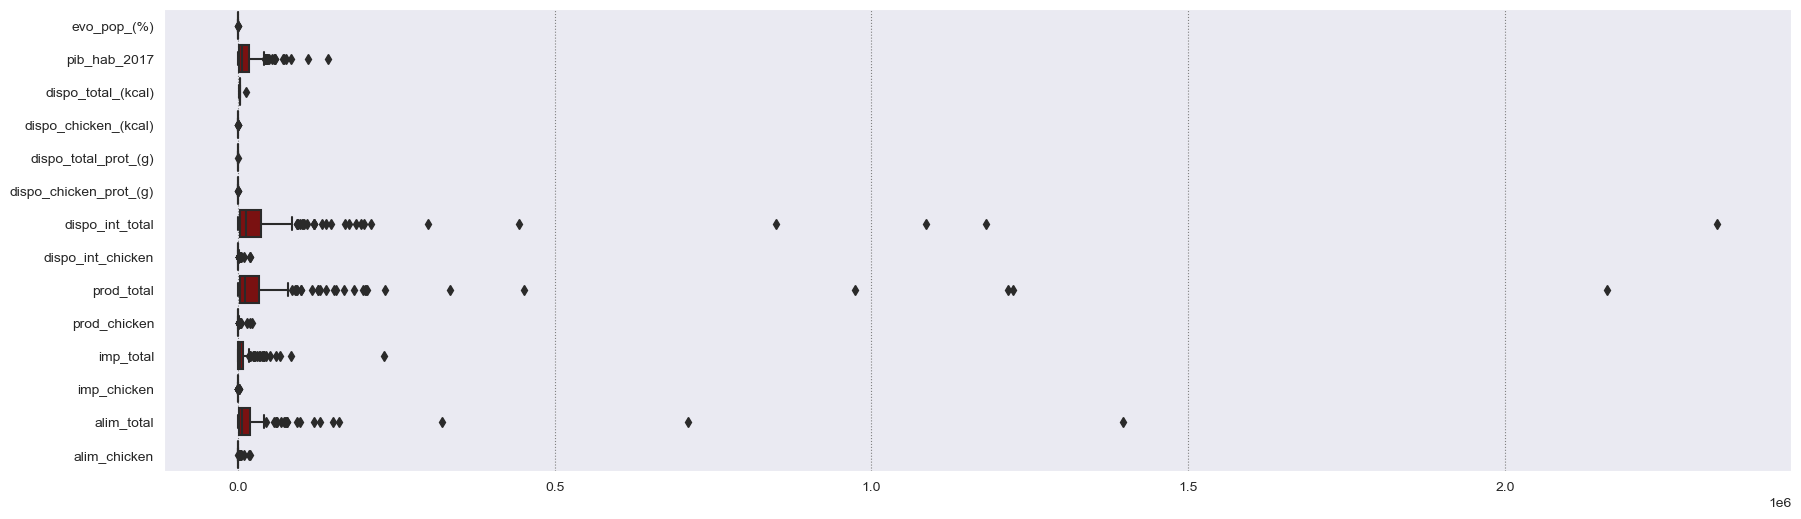

In [92]:
# Au vu du boxplot, il serait peut être plus intéressant de chercher des outliers sur un df standardisé
# Pas pertinent car les unitées sont différentes, on pourrait faire cela feature par feature mais est ce pertinent ?
plt.figure(figsize = (21,6))
sns.boxplot(data = df_final, orient = 'h', color = 'DarkRed')

In [93]:
df_final.describe()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02,164.000000,1.640000e+02,164.000000,164.000000,164.000000,1.640000e+02,164.000000
mean,1.153284,14491.219854,2915.969512,77.536585,82.759329,7.405366,6.716009e+04,712.237805,6.852410e+04,742.469512,8983.426829,92.701220,3.182590e+04,680.628049
std,0.147627,21254.837502,883.365333,69.981276,33.532480,6.411895,2.319891e+05,2277.505012,2.306189e+05,2559.365109,21828.983959,209.725359,1.256116e+05,2231.220319
min,0.873100,414.740323,1754.000000,0.000000,39.910000,0.040000,5.000000e+01,2.000000,2.300000e+01,0.000000,26.000000,0.000000,2.300000e+01,2.000000
25%,1.047818,1932.705801,2514.250000,22.000000,63.892500,2.252500,3.138250e+03,32.000000,2.604250e+03,13.750000,838.750000,3.000000,1.941750e+03,30.000000
50%,1.124772,6031.146548,2867.500000,65.500000,80.840000,6.680000,1.237000e+04,105.000000,1.088750e+04,71.500000,2671.500000,16.000000,6.676500e+03,101.000000
75%,1.251835,17639.086275,3260.000000,105.500000,96.445000,10.365000,3.654525e+04,372.750000,3.384400e+04,409.750000,7654.750000,79.750000,1.833175e+04,353.750000
max,1.755984,142260.741938,12525.000000,537.000000,425.400000,49.130000,2.335768e+06,19245.000000,2.161338e+06,21914.000000,230468.000000,1543.000000,1.397566e+06,18715.000000


In [94]:
# Est ce que l'on vire aussi les pays qui ne nous intéressent pas genre Chine, Japon, USA, Inde...
# Sur quels critères ?
# La projection de l'ACP (1er RUN) m'a permis d'identifier certains pays très éloigné
# On remarque trois pays vraiment très écartés, outliers  ?
# Sur les deux premières composantes (F1-F2) : Inde, USA, Chine
# Sur les deux suivantes (si ACP sur plus de deux composantes) (F2-F3) : USA, Brésil, Inde, Japon
# Sur les deux suivantes (si ACP sur plus de deux composantes) (F3-F4) :Inde, Chine, Brésil, USA

# ***--- A voir ---***

In [95]:
# # On enlève les pays trop extrème rapport à la projection de l'ACP et d'un premier run de l'analyse
# mask_pays_out = ['Chine', 'Inde', 'Brésil', "États-Unis d'Amérique"]
# df_final = df_final.loc[~df_final.index.isin(mask_pays_out)]

# ***--- Fin à voir ---***

#### *2.4. Dépendance et infos sur les variables*

In [96]:
# On regarde la dépendance entre nos variables car si elles sont trop corrélées cela risque de poser des soucis lors de l'analyse

In [97]:
# Dépendance linéaire entre les variables :

# If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model

# The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows :

# A value of 1 indicates there is no correlation between a given explanatory variable and any other explanatory variables in the model
# A value between 1 and 5 indicates moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention
# A value greater than 5 indicates potentially severe correlation between a given explanatory variable and other explanatory variables in the model

In [98]:
# Explication du VIF :

# Multicollinearity in regression analysis occurs when two or more explanatory variables are highly correlated with each other, such that they do not provide unique or independent information
# in the regression model.

# If the degree of correlation is high enough between variables, it can cause problems when fitting and interpreting the regression model. 

# One way to detect multicollinearity is by using a metric known as the variance inflation factor (VIF), which measures the correlation and strength of correlation between
# the explanatory variables in a regression model.

In [99]:
# Calcul de la corrélation entre nos variables choisies (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame() # On créé un df vide
vif_data['feature'] = df_final.columns # On prend les colonnes de notre df
  
# Calcul du VIF pour chaque feature
vif_data['VIF'] = [variance_inflation_factor(df_final.values, i) for i in range(len(df_final.columns))]

# df de sortie avec les valeurs VIF
vif_data

,feature,VIF
0,evo_pop_(%),24.061083
1,pib_hab_2017,3.519311
2,dispo_total_(kcal),177.225219
3,dispo_chicken_(kcal),66.987205
4,dispo_total_prot_(g),121.718072
5,dispo_chicken_prot_(g),76.598971
6,dispo_int_total,482.230540
7,dispo_int_chicken,668.273110
8,prod_total,378.330123
9,prod_chicken,245.533024


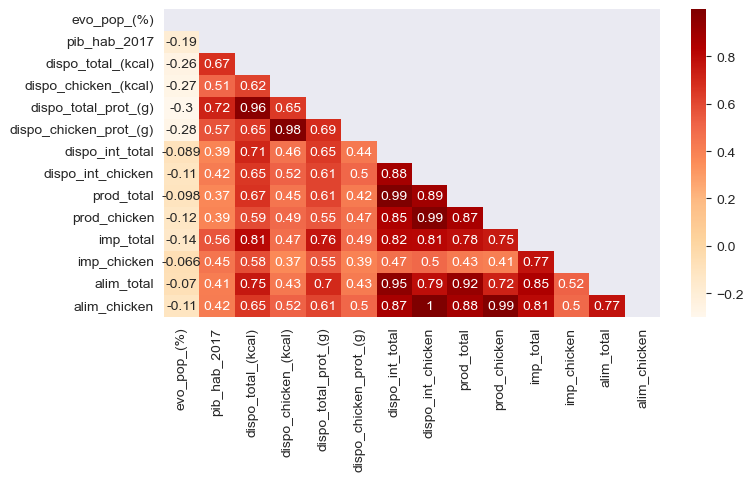

In [100]:
# Matrice de corrélation
# Calculate pairwise-correlation : df scaler
matrix = df_final.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(matrix, mask=mask, annot=True, cmap='OrRd')
plt.show()

In [101]:
df_final.head()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Afrique du Sud,1.160628,6723.928582,2987.0,143.0,83.36,14.11,66840.0,2118.0,68455.0,1667.0,9020.0,514.0,31726.0,2035.0
Albanie,0.950617,4521.752219,3400.0,85.0,119.50,6.26,4879.0,47.0,4231.0,13.0,884.0,38.0,3631.0,47.0
Algérie,1.211380,4134.936054,3345.0,22.0,92.85,1.97,45365.0,277.0,26763.0,275.0,19718.0,2.0,33056.0,264.0
Allemagne,1.016986,44670.222288,3559.0,71.0,104.07,7.96,174960.0,1739.0,167828.0,1514.0,66550.0,842.0,77988.0,1609.0


In [102]:
# Applique un background au df pour avoir un visu des valeurs
# test.style.background_gradient(cmap='OrRd')


### 4. Standardisation des données (pour ACP et autre)

In [103]:
# On centre/réduit nos données sans changer la distribution car selon les variables, les unitées ne sont pas les mêmes

In [104]:
# Pour tester, on fait un fillna avant le scaling (ne pose pas de pbs au scaling mais pour d'autres analyses, ACP, kmeans, ...)
# test = test.fillna(0)
df_final.isna().sum()

evo_pop_(%)               0
pib_hab_2017              0
dispo_total_(kcal)        0
dispo_chicken_(kcal)      0
dispo_total_prot_(g)      0
dispo_chicken_prot_(g)    0
dispo_int_total           0
dispo_int_chicken         0
prod_total                0
prod_chicken              0
imp_total                 0
imp_chicken               0
alim_total                0
alim_chicken              0
dtype: int64

In [105]:
df_final

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Afrique du Sud,1.160628,6723.928582,2987.0,143.0,83.36,14.11,66840.0,2118.0,68455.0,1667.0,9020.0,514.0,31726.0,2035.0
Albanie,0.950617,4521.752219,3400.0,85.0,119.50,6.26,4879.0,47.0,4231.0,13.0,884.0,38.0,3631.0,47.0
Algérie,1.211380,4134.936054,3345.0,22.0,92.85,1.97,45365.0,277.0,26763.0,275.0,19718.0,2.0,33056.0,264.0
Allemagne,1.016986,44670.222288,3559.0,71.0,104.07,7.96,174960.0,1739.0,167828.0,1514.0,66550.0,842.0,77988.0,1609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.537924,42522.377622,3370.0,147.0,107.26,14.80,11795.0,412.0,1793.0,48.0,14986.0,433.0,5958.0,412.0
Équateur,1.174084,6246.404252,2585.0,83.0,65.77,6.15,23810.0,341.0,30843.0,340.0,2134.0,0.0,9465.0,324.0
États-Unis d'Amérique,1.081423,59059.596403,3762.0,219.0,113.61,19.93,849821.0,18266.0,974034.0,21914.0,84507.0,123.0,322036.0,18100.0


In [106]:
# StandardScaler
# Scaling (StandardScaler()), transformation des données avec une moyenne = 0 et un ecart-type = 1

# On instancie notre scaler : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# On entraine et transforme nos données :
X_scaled = scaler.fit_transform(df_final)

# On remet notre scale sous forme de df
df_scaled = pd.DataFrame(X_scaled, columns = df_final.columns, index =  df_final.index)
df_scaled

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.613455,1.322852,0.515552,0.995640,0.732893,1.156800,-0.239385,-0.132231,-0.290243,-0.272176,0.275824,1.627562,-0.206566,-0.120764
Équateur,0.141325,-0.389091,-0.375816,0.078309,-0.508205,-0.196387,-0.187435,-0.163501,-0.163892,-0.157735,-0.314738,-0.443366,-0.178561,-0.160325
États-Unis d'Amérique,-0.488269,2.103280,0.960669,2.027638,0.922841,1.959326,3.384030,7.731059,3.938460,8.297517,3.470381,0.144911,2.317453,7.831017


In [107]:
# On voit bien que notre moyenne est de 0 et l'écart type de 1
df_scaled.describe()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
count,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02
mean,3.317130e-16,5.077239e-17,1.997048e-16,8.665155e-17,-1.787188e-16,1.678874e-16,-6.769653e-17,-1.963199e-17,-1.624717e-17,6.769653e-19,-4.400274e-18,-2.335530e-17,-2.775558e-17,-6.431170e-18
std,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00
min,-1.903732e+00,-6.643002e-01,-1.319418e+00,-1.111355e+00,-1.281759e+00,-1.152222e+00,-2.901672e-01,-3.128042e-01,-2.979414e-01,-2.909876e-01,-4.116024e-01,-4.433662e-01,-2.539598e-01,-3.050826e-01
25%,-7.165974e-01,-5.926641e-01,-4.561532e-01,-7.960227e-01,-5.643667e-01,-8.061030e-01,-2.768144e-01,-2.995915e-01,-2.867144e-01,-2.855987e-01,-3.742557e-01,-4.290180e-01,-2.386378e-01,-2.924950e-01
50%,-1.937264e-01,-3.992496e-01,-5.503721e-02,-1.725240e-01,-5.741322e-02,-1.134746e-01,-2.368986e-01,-2.674408e-01,-2.506869e-01,-2.629654e-01,-2.900391e-01,-3.668423e-01,-2.008288e-01,-2.605764e-01
75%,6.696071e-01,1.485548e-01,3.906472e-01,4.008081e-01,4.093818e-01,4.629986e-01,-1.323709e-01,-1.495178e-01,-1.508390e-01,-1.303990e-01,-6.105398e-02,-6.194237e-02,-1.077566e-01,-1.469506e-01
max,4.095081e+00,6.029726e+00,1.091107e+01,6.585628e+00,1.024947e+01,6.527310e+00,9.808894e+00,8.162232e+00,9.102567e+00,8.297517e+00,1.017743e+01,6.936408e+00,1.090602e+01,8.107495e+00


In [108]:
# Quelques graphes

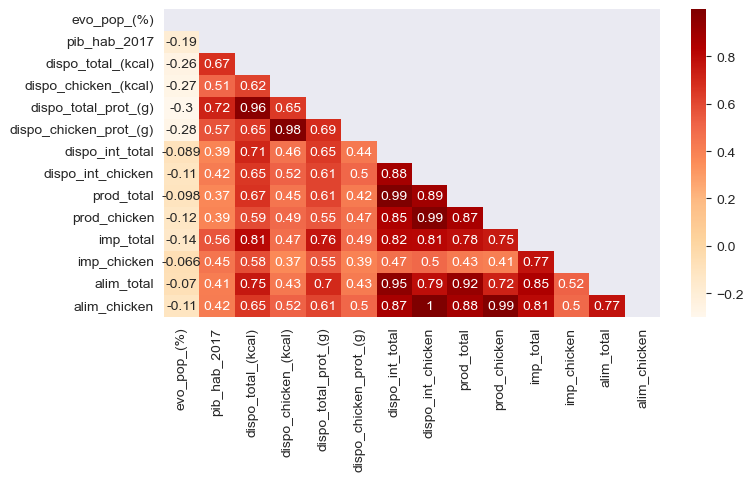

In [109]:
# Calcul pairwise-correlation : standardscaler
matrix = df_scaled.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=bool))
plt.figure(figsize=(8, 4))
sns.heatmap(matrix, mask=mask, annot=True, cmap='OrRd')
plt.show()

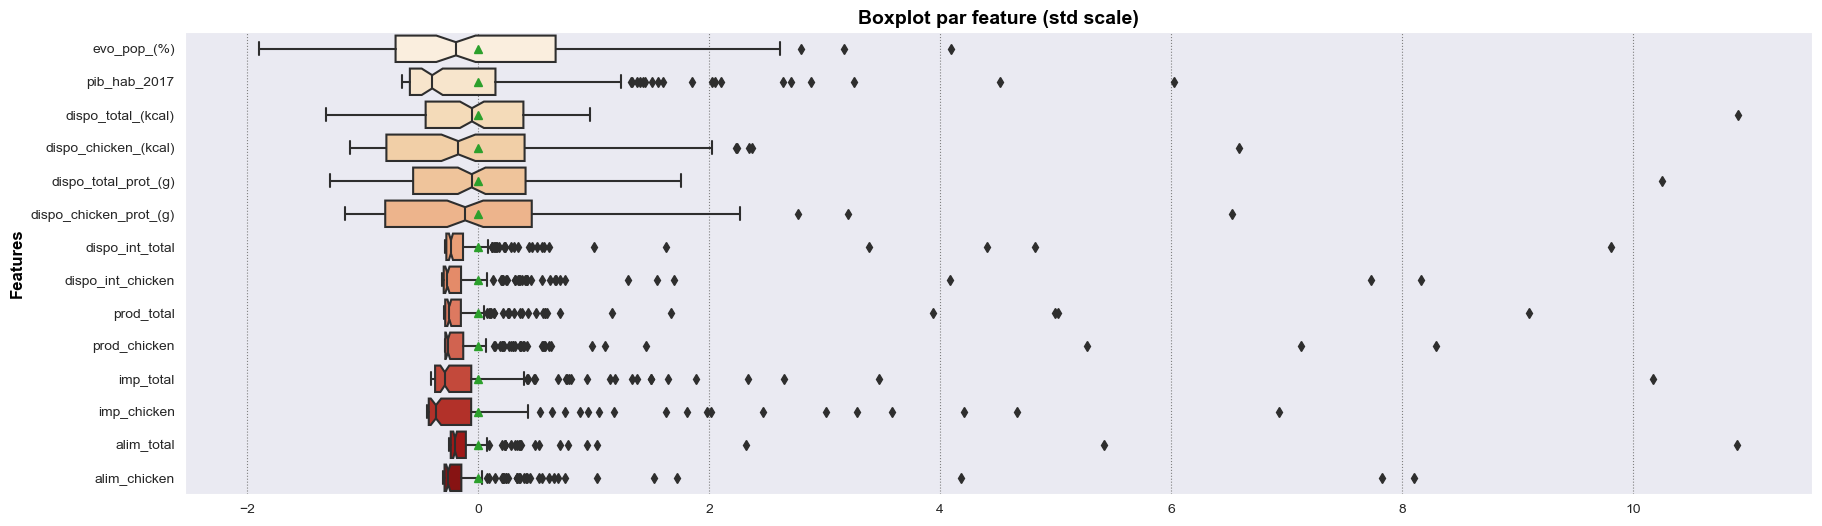

In [110]:
# Boxplot sur données standardisées pour vis de la répartition
plt.figure(figsize = (21,6))

sns.boxplot(data = df_scaled, orient = 'h', showmeans = True, palette = 'OrRd', notch=True)
plt.title('Boxplot par feature (std scale)', fontdict = {'fontsize' : '14', 'color' : 'black', 'fontweight' : 'bold'})
plt.ylabel('Features', fontdict = {'fontsize' : '12', 'color' : 'black', 'fontweight' : 'bold'})

plt.show()

In [111]:
# Visu des valeurs extrêmes sur production_chicken
# df_scaled.loc[df_scaled['production_chicken_(milliers)'] > 4]

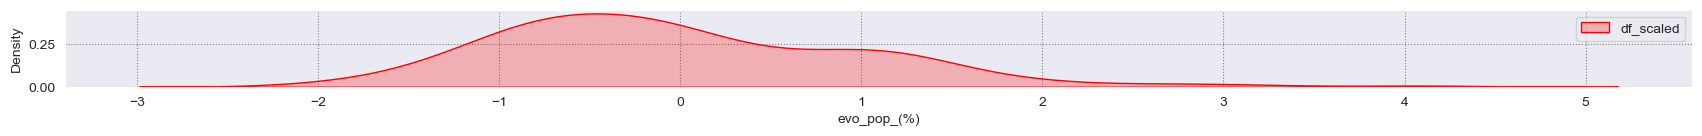

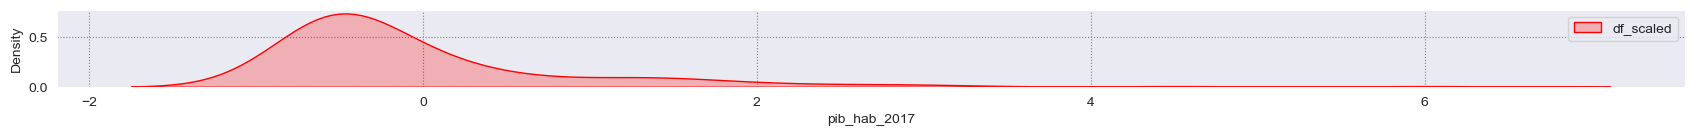

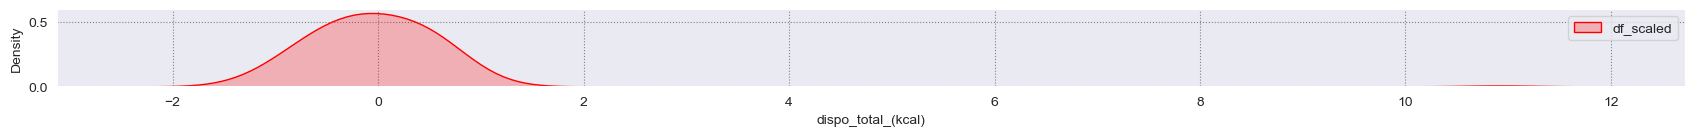

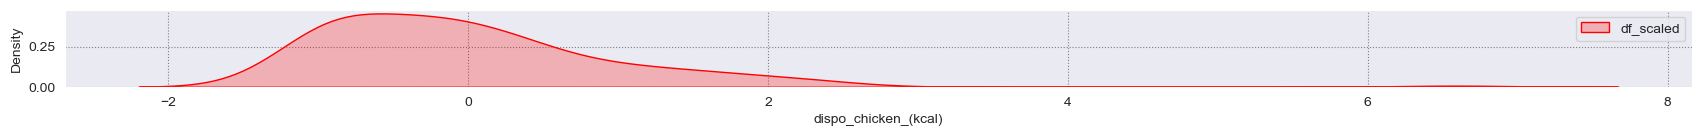

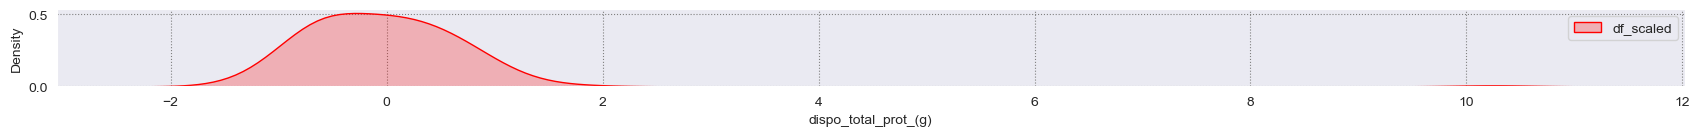

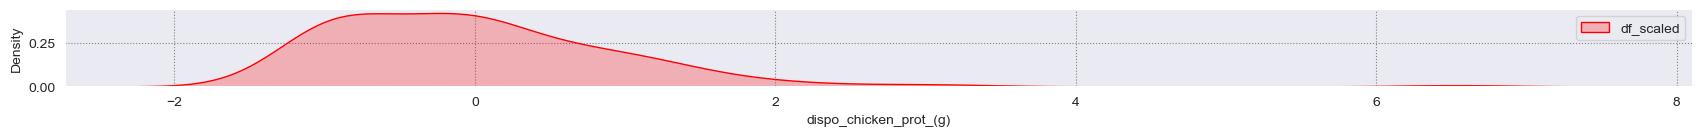

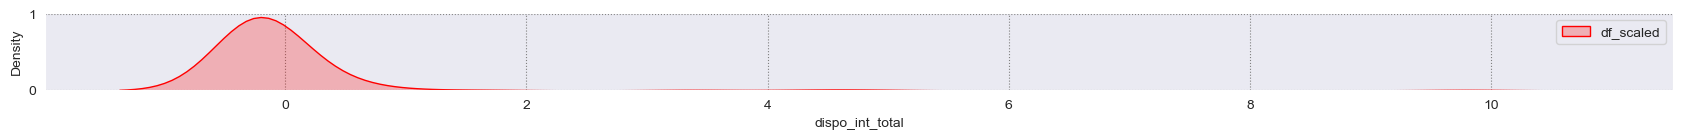

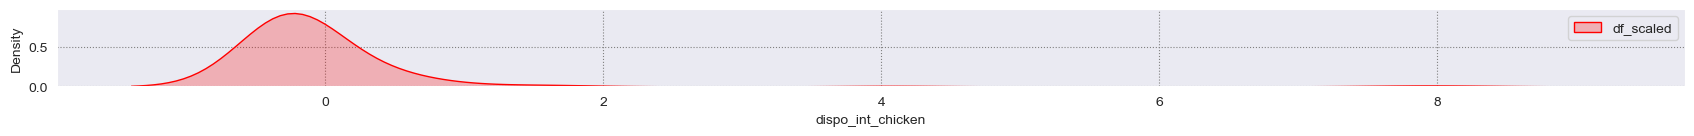

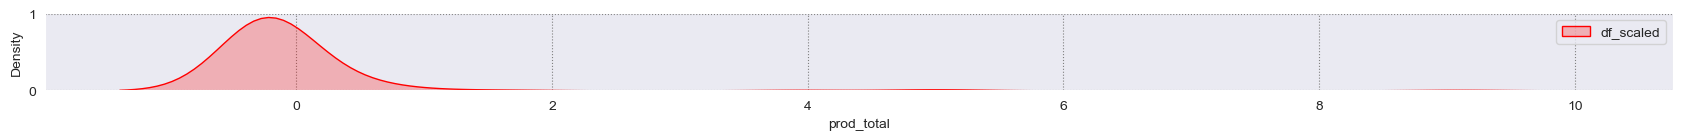

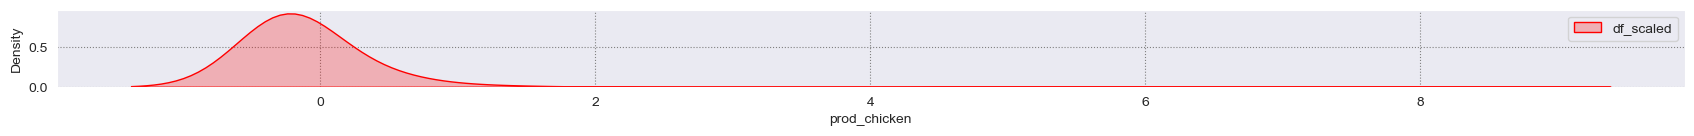

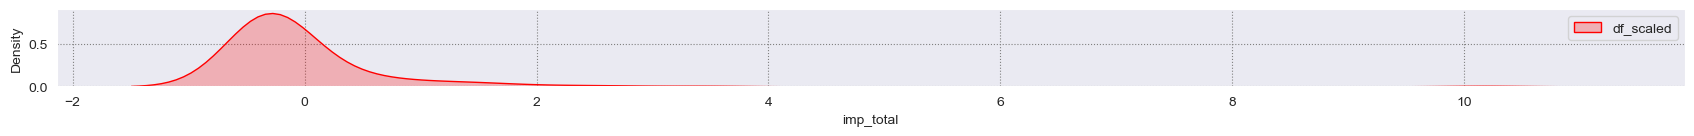

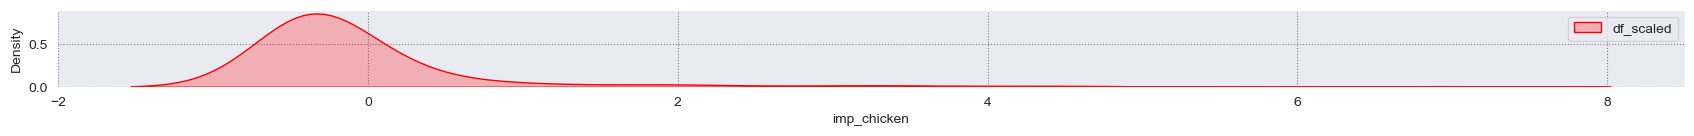

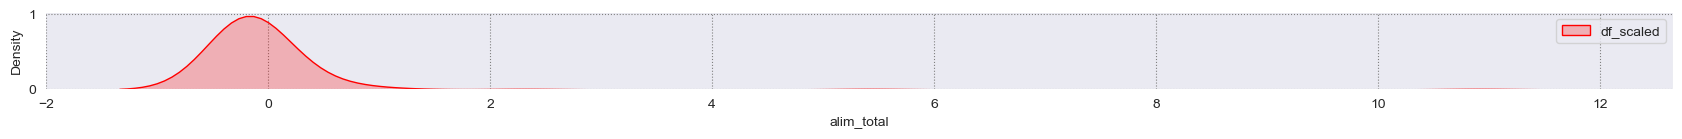

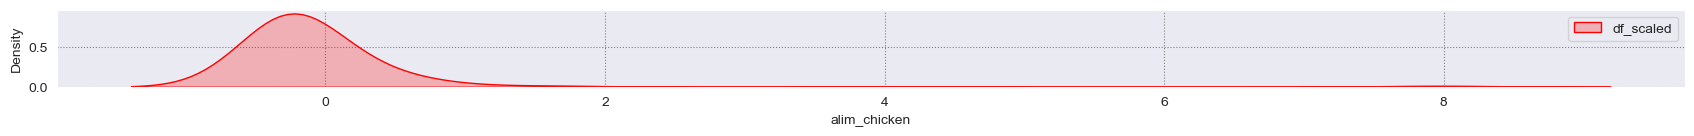

In [112]:
# Visu des dispersion selon la méthode de scalling
for i in df_scaled.columns:
    fig, ax = plt.subplots(1, 1, figsize = (21, 1))
    sns.kdeplot(ax = ax, data = df_scaled, x = i, fill = True, color = 'Red')
    plt.legend(['df_scaled'])
    plt.show()


# ***--- Fin à voir ---***
---

---
## Partie 3 - Exploration

In [113]:
# Faire un sch
# Faire un kmean
# Faire une acp

### 1. CAH (sur df_scaled)
---

In [114]:
# Note : Pour faire un clustering correct il est important que nos données aient le même ordre de grandeur sinon certaines variables prendront le pas
# sur le clustering

In [115]:
# On importe les lib nécessaires
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering

In [116]:
df_scaled

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.613455,1.322852,0.515552,0.995640,0.732893,1.156800,-0.239385,-0.132231,-0.290243,-0.272176,0.275824,1.627562,-0.206566,-0.120764
Équateur,0.141325,-0.389091,-0.375816,0.078309,-0.508205,-0.196387,-0.187435,-0.163501,-0.163892,-0.157735,-0.314738,-0.443366,-0.178561,-0.160325
États-Unis d'Amérique,-0.488269,2.103280,0.960669,2.027638,0.922841,1.959326,3.384030,7.731059,3.938460,8.297517,3.470381,0.144911,2.317453,7.831017


In [117]:
# On applique sur le df standardisé
Z = linkage(df_scaled, method = "ward", optimal_ordering = True)
pd.DataFrame(Z)

,0,1,2,3
0,28.0,87.0,0.209044,2.0
1,145.0,163.0,0.228830,2.0
2,23.0,92.0,0.279676,2.0
3,55.0,38.0,0.287902,2.0
4,0.0,156.0,0.297537,2.0
...,...,...,...,...
158,317.0,62.0,12.379975,3.0
159,311.0,320.0,14.528189,65.0
160,321.0,323.0,22.341484,160.0
161,322.0,324.0,26.815420,163.0


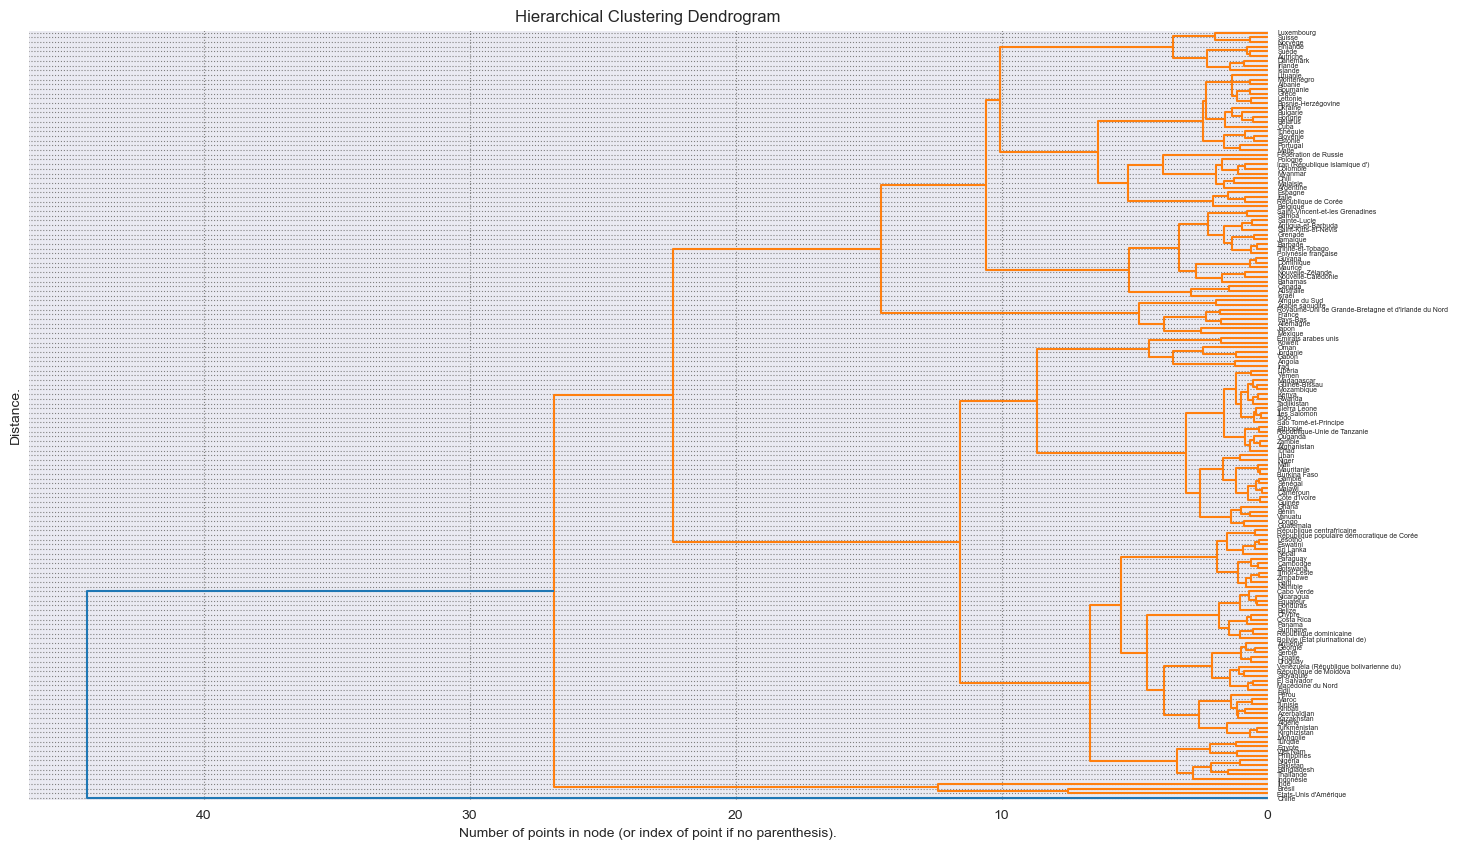

In [118]:
# On trace le dendrogramme
fig, ax = plt.subplots(1, 1, figsize = (16, 10))

dendrogram(Z, ax = ax, labels = df_scaled.index, orientation='left')

# plt.axvline(x = 11, color = 'black', linestyle = 'dashed')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

In [119]:
# On remarque un groupe de trois qui se démarque, outliers ?

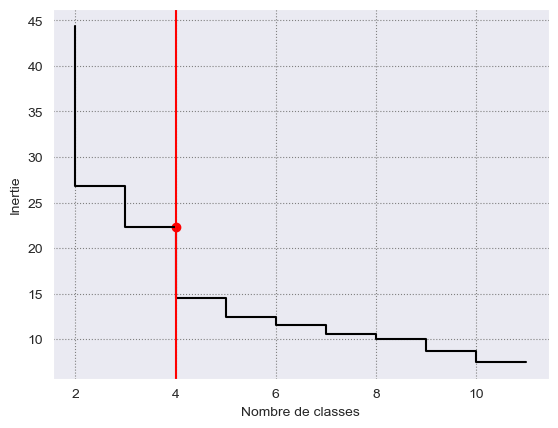

In [120]:
# Recherche du nombre optimal de clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)

# Graphe en escalier de la chute d'inertie par nombre de cluster
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")

# Ici, on teste le scénario où il y aurait x catégories
nombre = 4 

# On trace la ligne correspondant au nombre de cluster
plt.scatter(idxs[np.where(idxs == nombre)], last_rev[np.where(idxs == nombre)], c = "red")
plt.axvline(idxs[np.where(idxs == nombre)], c = "red")
plt.show()

In [121]:
# On défini les paramètres du clustering après avoir regarder le dendrogramme et l'inertie par classe
cah = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [122]:
# On entraine sur les données
cah.fit(df_scaled)

AgglomerativeClustering(n_clusters=5)

In [123]:
# Visu des clustering effectués sur le df scaled
cah_cluster = pd.DataFrame(cah.labels_).rename(columns = {0 : 'cah_cluster'})
cah_cluster

,cah_cluster
0,1
1,4
2,2
3,1
4,4
...,...
159,1
160,1
161,0
162,1


In [124]:
# On regarde le nombre d'individus par cluster
# Ce clustering est bizarre...
cah_cluster['cah_cluster'].value_counts()

1    95
2    57
4     8
0     3
3     1
Name: cah_cluster, dtype: int64

In [125]:
# On ajoute les cluster kmeans au df
df_scaled_cah = df_scaled.copy()
df_scaled_cah['cah_cluster'] = cah.labels_
df_scaled_cah

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken,cah_cluster
pays,,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256,1
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869,4
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853,2
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298,1
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.613455,1.322852,0.515552,0.995640,0.732893,1.156800,-0.239385,-0.132231,-0.290243,-0.272176,0.275824,1.627562,-0.206566,-0.120764,1
Équateur,0.141325,-0.389091,-0.375816,0.078309,-0.508205,-0.196387,-0.187435,-0.163501,-0.163892,-0.157735,-0.314738,-0.443366,-0.178561,-0.160325,1
États-Unis d'Amérique,-0.488269,2.103280,0.960669,2.027638,0.922841,1.959326,3.384030,7.731059,3.938460,8.297517,3.470381,0.144911,2.317453,7.831017,0


#### *Commentaires 1er RUN*

#### *Commentaires 2er RUN*

### 2. KMEAN (sur df_scaled)
---

In [126]:
# On fait un kmeans sur de df final
df_scaled

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.613455,1.322852,0.515552,0.995640,0.732893,1.156800,-0.239385,-0.132231,-0.290243,-0.272176,0.275824,1.627562,-0.206566,-0.120764
Équateur,0.141325,-0.389091,-0.375816,0.078309,-0.508205,-0.196387,-0.187435,-0.163501,-0.163892,-0.157735,-0.314738,-0.443366,-0.178561,-0.160325
États-Unis d'Amérique,-0.488269,2.103280,0.960669,2.027638,0.922841,1.959326,3.384030,7.731059,3.938460,8.297517,3.470381,0.144911,2.317453,7.831017


In [127]:
# Recherche pour trouver le nombre de cluster opti
# On part sur x cluster à tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [128]:
# On défini une liste vide poury stocker l'inertie des clusters
intertia = []
# On entraine kmeans en boucle pour faire des cluster de 1 à x comme défini plus haut et récupérer l'inertie de chaque cluster
for i in k_list :
  kmeans = KMeans(n_clusters=i) # On entraine kmeans sur un nombre de cluster test
  kmeans.fit(df_scaled) 
  intertia.append(kmeans.inertia_) # On ajoute l'inertie de chaque cluster dans une liste

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


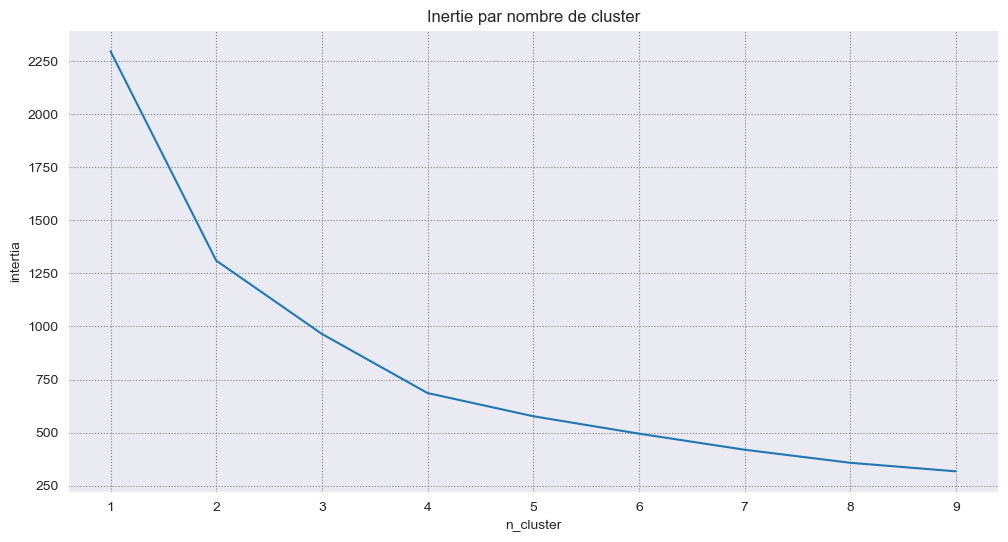

In [129]:
# On trace l'inertie par cluster (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

plt.title('Inertie par nombre de cluster')
plt.show()

In [130]:
# Calcul du score de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

for i in k_list :
    # Instanciation de kmeans
    km = KMeans(n_clusters=i+1)

    # Entrainement sur le model
    km.fit_predict(df_scaled)

    # Calcul du score de silhouette
    score = silhouette_score(df_scaled, km.labels_, metric='euclidean')

    # Résultat
    print('Nombre cluster :', i+1, '--> Silhouette Score = %.3f' % score)

Nombre cluster : 2 --> Silhouette Score = 0.887
Nombre cluster : 3 --> Silhouette Score = 0.744
Nombre cluster : 4 --> Silhouette Score = 0.298
Nombre cluster : 5 --> Silhouette Score = 0.319
Nombre cluster : 6 --> Silhouette Score = 0.308
Nombre cluster : 7 --> Silhouette Score = 0.280
Nombre cluster : 8 --> Silhouette Score = 0.298
Nombre cluster : 9 --> Silhouette Score = 0.304
Nombre cluster : 10 --> Silhouette Score = 0.322


In [131]:
# Nombre de cluster
i = 4

# Instanciation de kmeans
km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Entrainement sur le model
km.fit_predict(df_scaled)

# Calcul du score de silhouette
score = silhouette_score(df_scaled, km.labels_, metric='euclidean')

# Résultat
print('Nombre cluster :', i, '--> Silhouette Score = %.3f' % score)

Nombre cluster : 4 --> Silhouette Score = 0.298


In [132]:
# D'après le graph, on choisi 5 cluster voir 6
# Toutefois ce n'est pas asser marqué, revoir les données d'entrées ?
# Trouver des features qui permettent de mieux différencier les  pays, donc mieux faire les clusters

# On instancie kmeans
kmeans = KMeans(n_clusters=5)
# On entraine kmeans
kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [133]:
# On récupère les clusters donnés par kmeans (.labels_)
kmean_cluster = pd.DataFrame(kmeans.labels_).rename(columns = {0 : 'kmean_cluster'})
kmean_cluster

,kmean_cluster
0,3
1,2
2,0
3,3
4,2
...,...
159,2
160,3
161,4
162,3


In [134]:
# Centroides des cluster
# Le cluster est en index
kmean_centroide = pd.DataFrame(kmeans.cluster_centers_)
kmean_centroide.columns = kmeans.feature_names_in_
kmean_centroide


,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
0,-0.600270,0.321850,0.218335,0.475869,0.299404,0.494451,-0.180868,-0.144297,-0.175907,-0.130626,-0.163227,-0.213354,-0.167029,-0.146424
1,-0.664516,6.029726,10.911070,6.585628,10.249469,6.527310,9.808894,8.162232,9.102567,7.122153,10.177429,6.936408,10.906024,8.107495
2,-0.168422,0.804567,0.449900,0.363672,0.476618,0.479140,0.196887,0.536129,0.167853,0.381687,1.288604,2.604112,0.166052,0.532771
3,0.673747,-0.556638,-0.456686,-0.679196,-0.532906,-0.706695,-0.148432,-0.221993,-0.157996,-0.220050,-0.232321,-0.255332,-0.120582,-0.217524
4,-0.348616,0.431346,0.294887,0.943085,0.218386,0.737547,4.202286,4.370788,4.651222,4.890176,1.670865,-0.242491,2.921359,4.346493


In [135]:
# Features du kmeans
kmeans.feature_names_in_

array(['evo_pop_(%)', 'pib_hab_2017', 'dispo_total_(kcal)',
       'dispo_chicken_(kcal)', 'dispo_total_prot_(g)',
       'dispo_chicken_prot_(g)', 'dispo_int_total', 'dispo_int_chicken',
       'prod_total', 'prod_chicken', 'imp_total', 'imp_chicken',
       'alim_total', 'alim_chicken'], dtype=object)

In [136]:
# On regarde le nombre d'individus par cluster
# Ce clustering est bizarre...
kmean_cluster['kmean_cluster'].value_counts()

0    76
3    73
2    11
4     3
1     1
Name: kmean_cluster, dtype: int64

In [137]:
# On ajoute les cluster kmeans au df_scaled
df_scaled_kmeans = df_scaled.copy()
# Pas besoin de faire un merge, ajoute juste une colonne avec les clusters de kmeans (les index n'ont pas changés 0 = Afg, 1 = Afri, ...)
df_scaled_kmeans['kmean_cluster'] = kmeans.labels_
df_scaled_kmeans

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken,kmean_cluster
pays,,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256,3
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869,2
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853,0
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298,3
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,2.613455,1.322852,0.515552,0.995640,0.732893,1.156800,-0.239385,-0.132231,-0.290243,-0.272176,0.275824,1.627562,-0.206566,-0.120764,2
Équateur,0.141325,-0.389091,-0.375816,0.078309,-0.508205,-0.196387,-0.187435,-0.163501,-0.163892,-0.157735,-0.314738,-0.443366,-0.178561,-0.160325,3
États-Unis d'Amérique,-0.488269,2.103280,0.960669,2.027638,0.922841,1.959326,3.384030,7.731059,3.938460,8.297517,3.470381,0.144911,2.317453,7.831017,4


In [138]:
# On peux aussi calculer les centroides en groupant sur les cluster et en calculant la moyenne des variables
df_scaled_kmeans.groupby('kmean_cluster').mean()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
kmean_cluster,,,,,,,,,,,,,,
0,-0.600270,0.321850,0.218335,0.475869,0.299404,0.494451,-0.180868,-0.144297,-0.175907,-0.130626,-0.163227,-0.213354,-0.167029,-0.146424
1,-0.664516,6.029726,10.911070,6.585628,10.249469,6.527310,9.808894,8.162232,9.102567,7.122153,10.177429,6.936408,10.906024,8.107495
2,-0.168422,0.804567,0.449900,0.363672,0.476618,0.479140,0.196887,0.536129,0.167853,0.381687,1.288604,2.604112,0.166052,0.532771
3,0.673747,-0.556638,-0.456686,-0.679196,-0.532906,-0.706695,-0.148432,-0.221993,-0.157996,-0.220050,-0.232321,-0.255332,-0.120582,-0.217524
4,-0.348616,0.431346,0.294887,0.943085,0.218386,0.737547,4.202286,4.370788,4.651222,4.890176,1.670865,-0.242491,2.921359,4.346493


In [139]:
# Visu en pairplot avec cluster
# sns.pairplot(df_scaled_kmeans, hue = 'kmeans_cluster')

#### *Commentaires 1er RUN*

<AxesSubplot:xlabel='dispo_total_(kcal)', ylabel='dispo_chicken_(kcal)'>

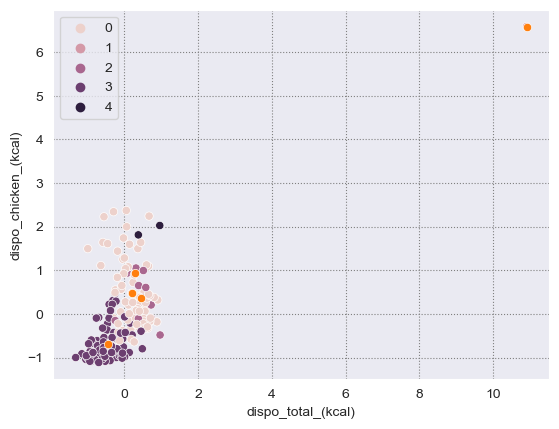

In [140]:
# Scatter cluster + centroides
sns.scatterplot(data = df_scaled_kmeans, x = 'dispo_total_(kcal)', y = 'dispo_chicken_(kcal)', hue = 'kmean_cluster')
sns.scatterplot(data = kmean_centroide, x = 'dispo_total_(kcal)', y = 'dispo_chicken_(kcal)')

#### *Commentaires 2er RUN*

### 3. ACP
---

In [141]:
df_scaled.head()

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.263986,-0.658854,-1.043491,-1.039689,-0.857591,-1.074003,-0.224926,-0.288581,-0.247549,-0.280014,-0.203490,-0.304667,-0.150588,-0.281256
Afrique du Sud,0.049895,-0.366556,0.080655,0.938307,0.017968,1.048858,-0.001384,0.619128,-0.000301,0.362341,0.001681,2.014964,-0.000798,0.608869
Albanie,-1.377038,-0.470481,0.549617,0.106975,1.099030,-0.179179,-0.269288,-0.292985,-0.279639,-0.285893,-0.372176,-0.261622,-0.225148,-0.284853
Algérie,0.394735,-0.488736,0.487165,-0.796023,0.301844,-0.850297,-0.094237,-0.191688,-0.181637,-0.183210,0.493264,-0.433801,0.009823,-0.187298
Allemagne,-0.926088,1.424214,0.730162,-0.093691,0.637470,0.086766,0.466100,0.452208,0.431916,0.302377,2.645239,3.583705,0.368624,0.417357


In [142]:
# Définition du nombre de composantes voulues
n_components = 3

In [143]:
pca = PCA(n_components=n_components)

In [144]:
# On entraine sur nos données standardisées
pca.fit(df_scaled)

PCA(n_components=3)

In [145]:
# Variance expliquée
pca.explained_variance_ratio_

array([0.63330506, 0.12974907, 0.07188732])

In [146]:
# % de variance expliqué par composantes
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([63.33, 12.97,  7.19])

In [147]:
# Somme cumulée des variances expliquées
scree_cum = scree.cumsum().round()
scree_cum

array([63., 76., 83.])

In [148]:
# Nombre de composantes qui expliquent la variance
print(len(scree_cum), 'composantes expliquent', scree_cum[-1], '% de la variance')

3 composantes expliquent 83.0 % de la variance


In [149]:
# Nombre de composantes calculées
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3]

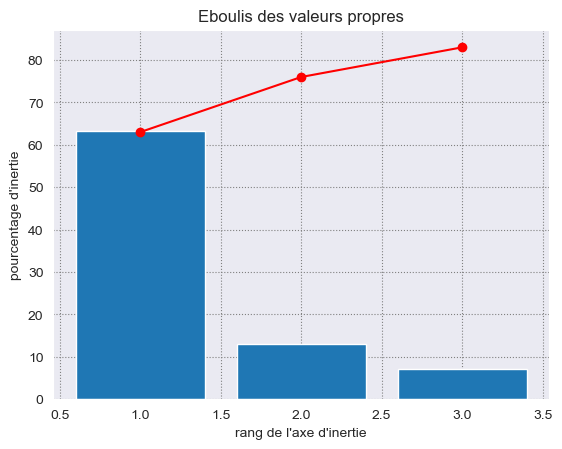

In [150]:
# Graphique d'éboulis des valeurs propres
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [151]:
# Composantes par variables
pcs = pca.components_
pcs

array([[-0.07157326,  0.20932854,  0.2923371 ,  0.22874433,  0.28327626,
         0.22995442,  0.30410093,  0.30585804,  0.29902098,  0.29085709,
         0.306443  ,  0.21407563,  0.2960742 ,  0.30449281],
       [ 0.33785547, -0.34083747, -0.19843729, -0.38717977, -0.2690763 ,
        -0.42394298,  0.24843854,  0.21766514,  0.26781643,  0.23694346,
         0.06082707, -0.07307684,  0.19076888,  0.2141674 ],
       [-0.42600089, -0.27370503, -0.20158692,  0.30750449, -0.17406348,
         0.24510543,  0.05534606,  0.1749675 ,  0.11646994,  0.26407544,
        -0.27471646, -0.53221009, -0.10144707,  0.17902963]])

In [152]:
# On met les composantes sous forme de df
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.071573,0.209329,0.292337,0.228744,0.283276,0.229954,0.304101,0.305858,0.299021,0.290857,0.306443,0.214076,0.296074,0.304493
1,0.337855,-0.340837,-0.198437,-0.387180,-0.269076,-0.423943,0.248439,0.217665,0.267816,0.236943,0.060827,-0.073077,0.190769,0.214167
2,-0.426001,-0.273705,-0.201587,0.307504,-0.174063,0.245105,0.055346,0.174968,0.116470,0.264075,-0.274716,-0.532210,-0.101447,0.179030


In [153]:
# On récupère les features
features = df_scaled.columns
features

Index(['evo_pop_(%)', 'pib_hab_2017', 'dispo_total_(kcal)',
       'dispo_chicken_(kcal)', 'dispo_total_prot_(g)',
       'dispo_chicken_prot_(g)', 'dispo_int_total', 'dispo_int_chicken',
       'prod_total', 'prod_chicken', 'imp_total', 'imp_chicken', 'alim_total',
       'alim_chicken'],
      dtype='object')

In [154]:
# On regarde les composantes par variables
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
F1,-0.07,0.21,0.29,0.23,0.28,0.23,0.30,0.31,0.30,0.29,0.31,0.21,0.30,0.30
F2,0.34,-0.34,-0.20,-0.39,-0.27,-0.42,0.25,0.22,0.27,0.24,0.06,-0.07,0.19,0.21
F3,-0.43,-0.27,-0.20,0.31,-0.17,0.25,0.06,0.17,0.12,0.26,-0.27,-0.53,-0.10,0.18


In [155]:
# df des composantes par variables transposé
pcs.T.round(2)

,F1,F2,F3
evo_pop_(%),-0.07,0.34,-0.43
pib_hab_2017,0.21,-0.34,-0.27
dispo_total_(kcal),0.29,-0.20,-0.20
dispo_chicken_(kcal),0.23,-0.39,0.31
dispo_total_prot_(g),0.28,-0.27,-0.17
dispo_chicken_prot_(g),0.23,-0.42,0.25
dispo_int_total,0.30,0.25,0.06
dispo_int_chicken,0.31,0.22,0.17
prod_total,0.30,0.27,0.12
prod_chicken,0.29,0.24,0.26


<AxesSubplot:>

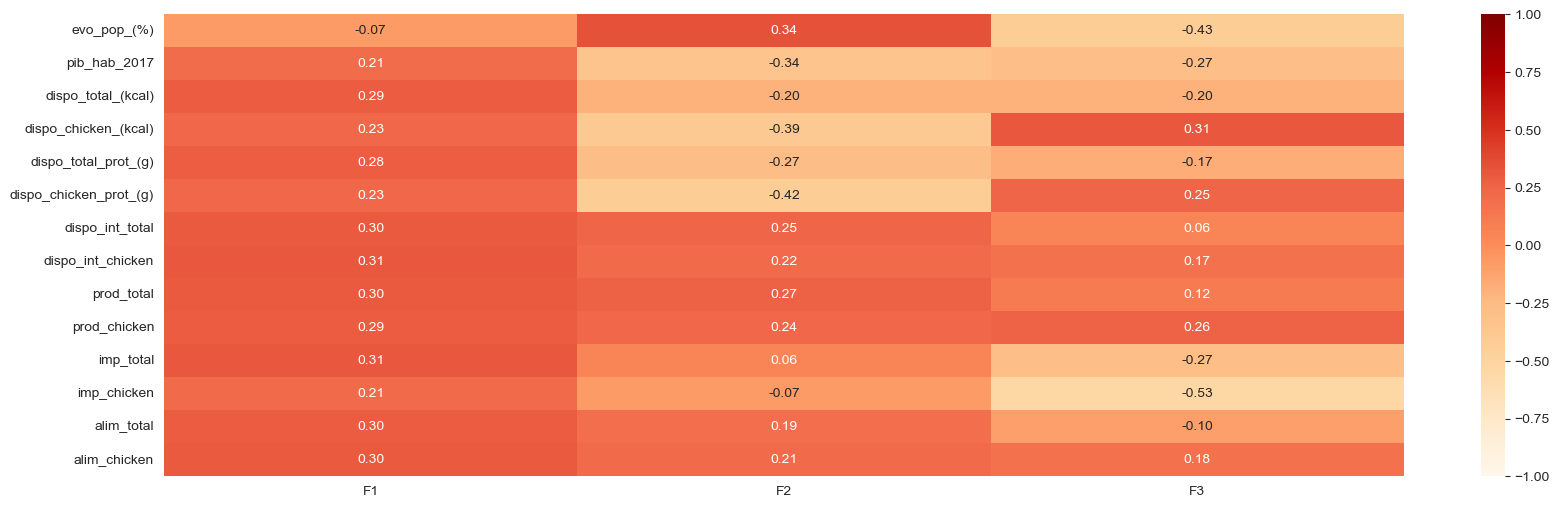

In [156]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="OrRd", fmt="0.2f")

#### *3.1. Cercle de corrélation*

In [157]:
# Fonction pour cercle de corrélation

In [158]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire, et c'est tout à fait mon genre bien sur ;)
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

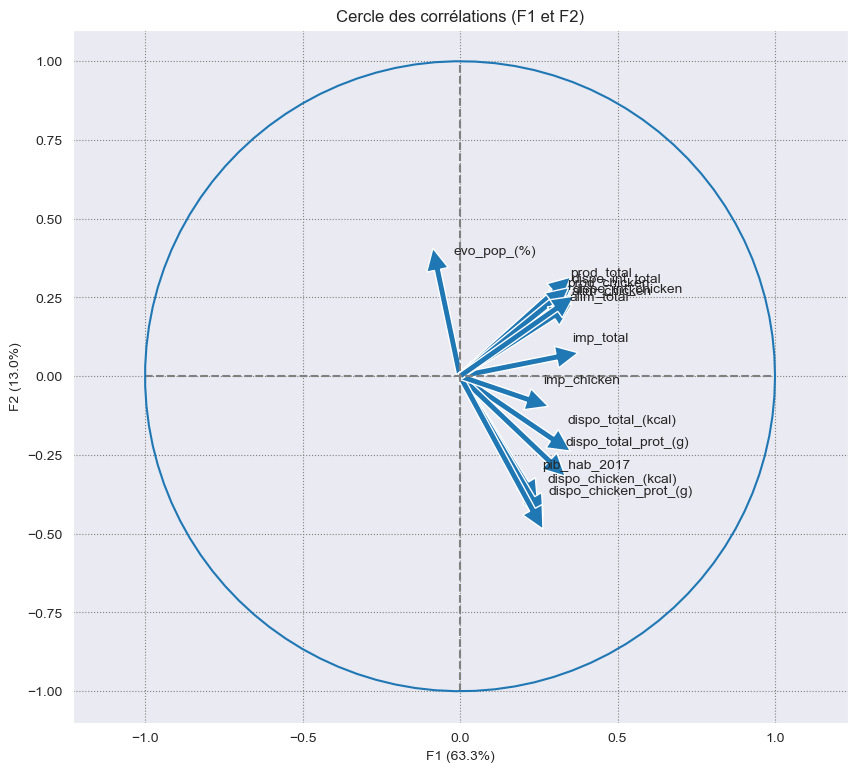

In [159]:
# On sélectionne les deux axes de projection pour le cercle de corrélations
x_y = (0,1)
x_y
correlation_graph(pca, x_y, features = features)

#### *Commentaires 1er RUN*

#### *Commentaires 2er RUN*

#### *3.1. Projection de l'ACP*

In [160]:
# Calcul des coordonnées de projection par individus
# On entraine et ontransforme sur df_scaled
X_proj = pca.fit_transform(df_scaled)
X_proj[:5]

array([[-1.83110246,  1.61687723, -0.56419629],
       [ 1.31546237, -0.48370086, -0.15455799],
       [-0.20638462, -1.05591065,  0.44136432],
       [-0.4709721 ,  0.65700679, -0.68578119],
       [ 3.06814101, -0.65496682, -2.62257212]])

In [161]:
# Fonction pour projection des individus sur les axes

In [162]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette = 'Dark2')

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire... Hahaha, oui, c'est tout a fait mon genre mdr
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='10', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    
    plt.show()

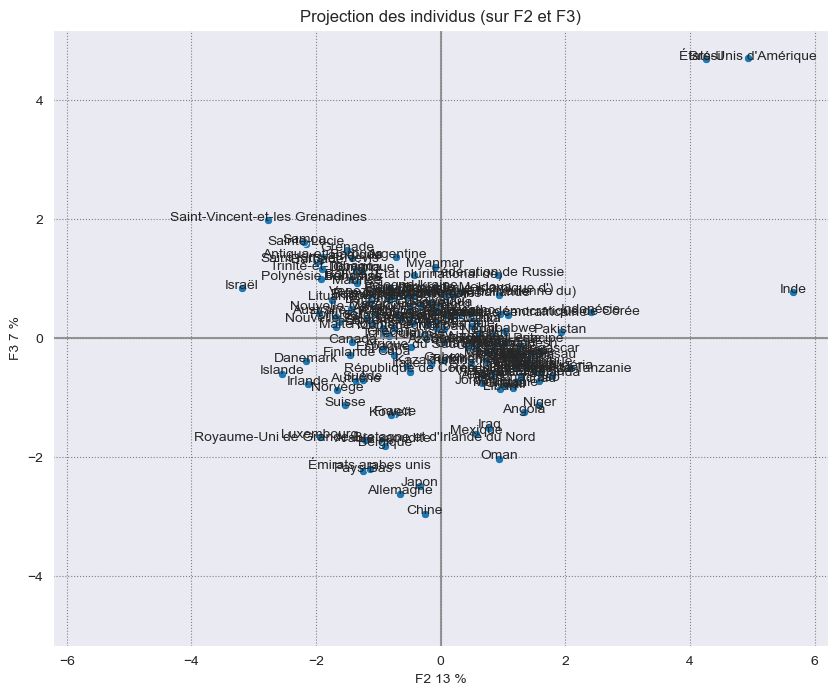

In [163]:
# On projete les individus sur F'x' et on les tri par les cluster que nous avons chercher sur les composantes
# On remarque que certains pays sont très éloignés...
# J'ai pris le clustering issu de KMeans
x_y = [1,2] # Choix des composantes de l'ACP à représenter dans le plan
display_factorial_planes(X_proj, x_y, pca = pca, labels = df_scaled.index)

In [164]:
cah_cluster

,cah_cluster
0,1
1,4
2,2
3,1
4,4
...,...
159,1
160,1
161,0
162,1


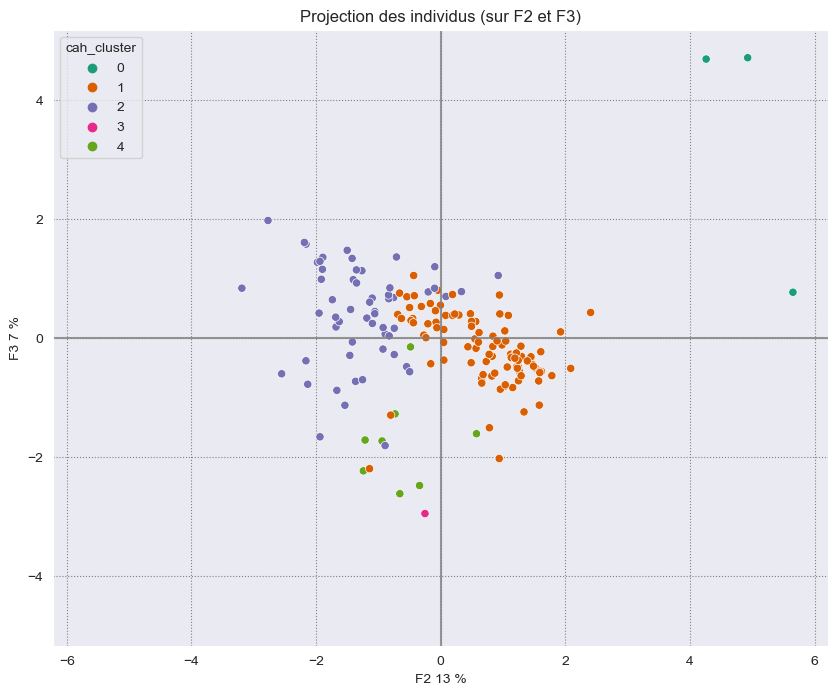

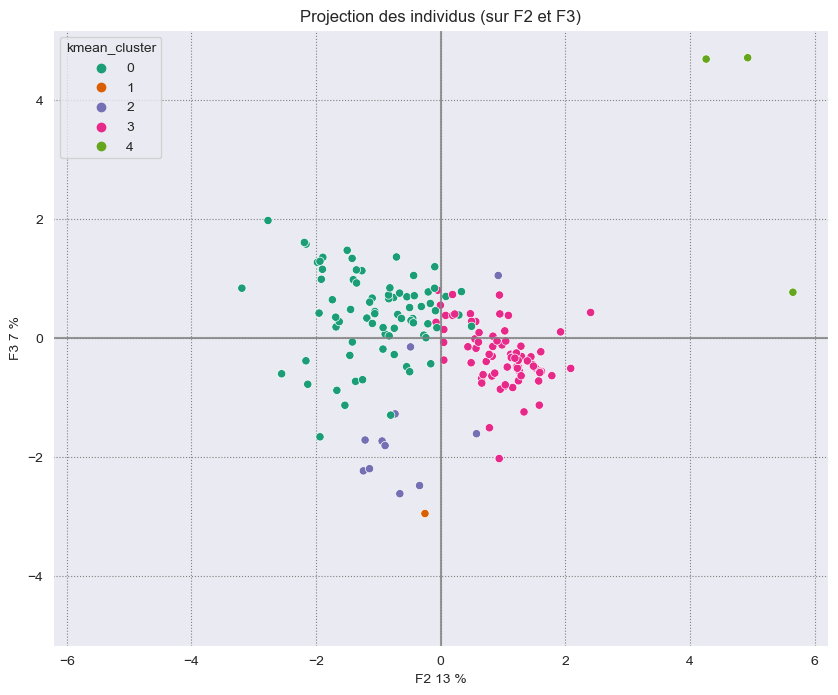

In [165]:
# Visu de la projection et visu selon méthode de clustering (Attention, ce sont les clustering effectués sur df_scale
display_factorial_planes(X_proj, x_y, pca = pca, clusters = cah_cluster['cah_cluster'])
display_factorial_planes(X_proj, x_y, pca = pca, clusters = kmean_cluster['kmean_cluster'])

In [166]:
# On fait un df des composantes de nos individus sur les différents axes
df_projection = pd.DataFrame(X_proj)
df_projection.columns = [f'F{i}' for i in x_list]
df_projection = df_projection.set_index(df_scaled.index)
df_projection

,F1,F2,F3
pays,,,
Afghanistan,-1.831102,1.616877,-0.564196
Afrique du Sud,1.315462,-0.483701,-0.154558
Albanie,-0.206385,-1.055911,0.441364
Algérie,-0.470972,0.657007,-0.685781
Allemagne,3.068141,-0.654967,-2.622572
...,...,...,...
Émirats arabes unis,0.997763,-1.141232,-2.201910
Équateur,-0.867579,0.226056,0.398571
États-Unis d'Amérique,13.081738,4.927591,4.708033


#### *Commentaires 1er RUN*

In [167]:
# Interpetation de la projection des individus - 1er RUN

    # On remarque x pays vraiment très écartés, outliers  ?
    # Sur les deux premières composantes (F1-F2) : Inde, USA, Chine, Brésil
    # Sur les deux premières composantes (F2-F3) : Inde, USA, Brésil


#### *Commentaires 2er RUN*

---
## Partie 4 - Clustering après exploration

### 1. CAH (Après ACP)
---

In [168]:
# On  récupère les composantes des individus
df_comp_indiv_acp = df_projection
df_comp_indiv_acp.sample(5)

,F1,F2,F3
pays,,,
Pérou,-0.180526,0.292744,0.382105
Japon,2.590350,-0.338224,-2.485410
République populaire démocratique de Corée,-1.762374,0.949587,0.400143
Pays-Bas,1.812458,-1.240515,-2.238749
Jordanie,-0.816141,0.660018,-0.762556


In [169]:
# On applique sur le df standardisé
Z = linkage(df_comp_indiv_acp, method = "ward", optimal_ordering = True)
pd.DataFrame(Z)

,0,1,2,3
0,162.0,125.0,0.024287,2.0
1,38.0,87.0,0.029489,2.0
2,140.0,132.0,0.064377,2.0
3,9.0,36.0,0.073898,2.0
4,74.0,96.0,0.075583,2.0
...,...,...,...,...
158,319.0,320.0,10.492760,91.0
159,312.0,322.0,12.862615,100.0
160,323.0,318.0,22.023455,160.0
161,321.0,324.0,26.545723,163.0


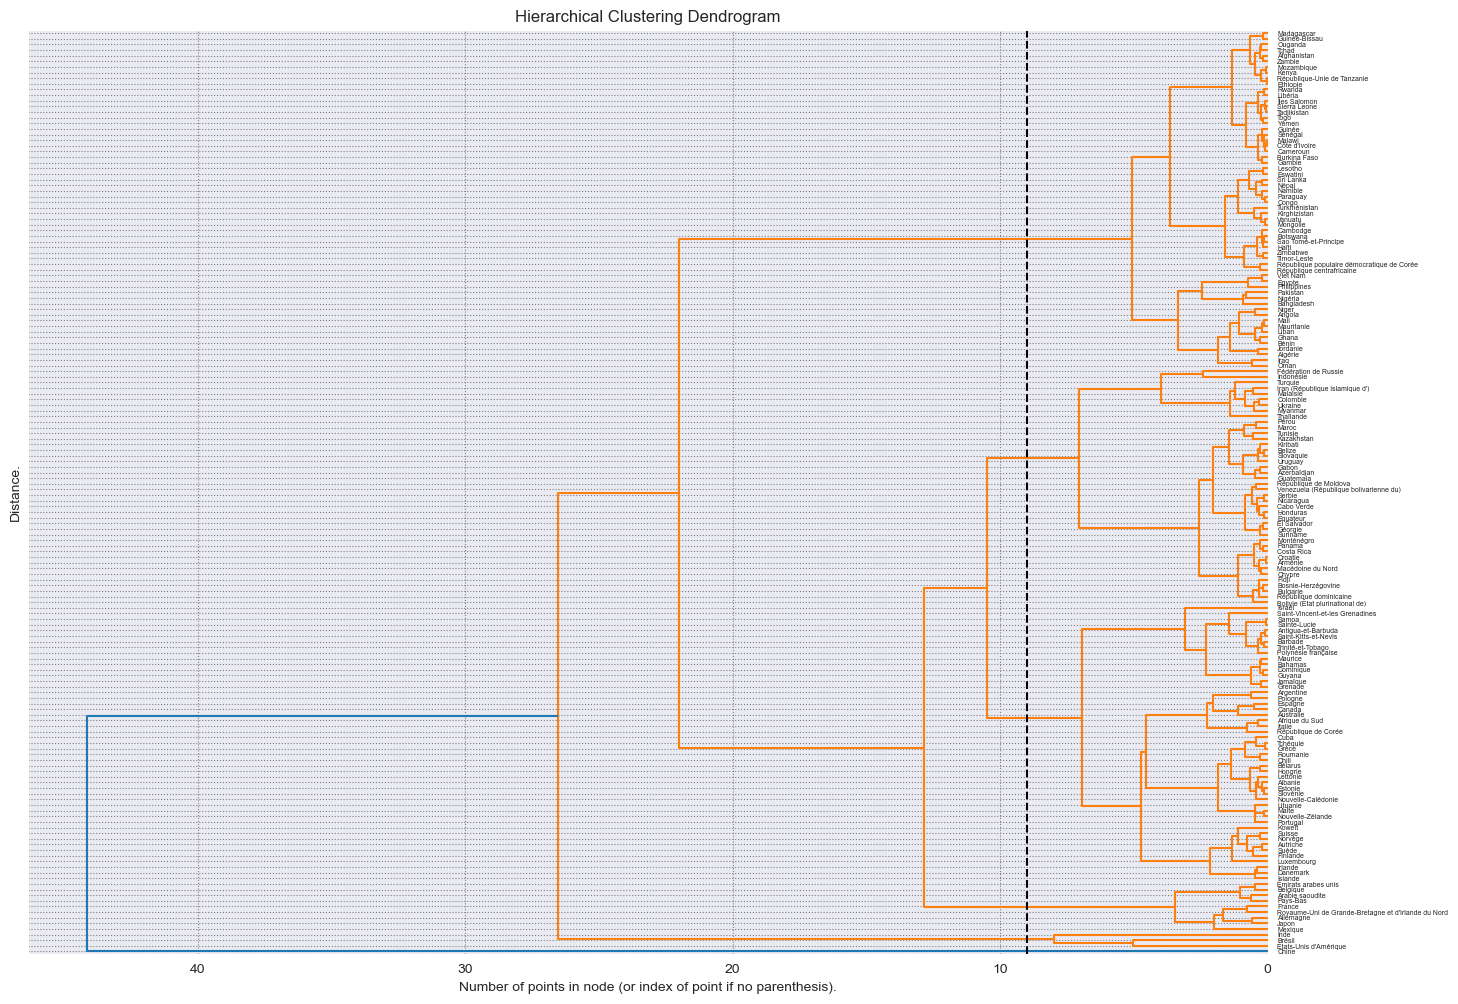

In [170]:
# On trace le dendrogramme
fig, ax = plt.subplots(1, 1, figsize = (16, 12))

dendrogram(Z, ax = ax, labels = df_projection.index, orientation = 'left')

plt.axvline(x = 9, color = 'black', linestyle = 'dashed')
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

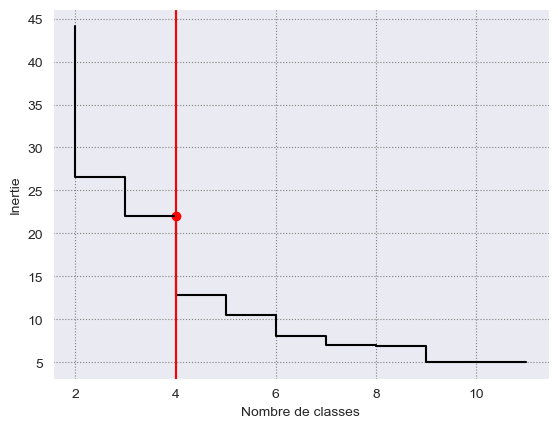

In [171]:
# Recherche du nombre optimal de clusters
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)

# Graphe en escalier de la chute d'inertie par nombre de cluster
plt.step(idxs, last_rev, c = "black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")

# Ici, on teste le scénario où il y aurait x catégories
nombre = 4 

# On trace la ligne correspondant au nombre de cluster
plt.scatter(idxs[np.where(idxs == nombre)], last_rev[np.where(idxs == nombre)], c = "red")
plt.axvline(idxs[np.where(idxs == nombre)], c = "red")
plt.show()

In [179]:
# On défini les paramètres du clustering après avoir regarder le dendrogramme et l'inertie par classe
cah = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

In [180]:
# On entraine sur les données
cah.fit(df_comp_indiv_acp)

AgglomerativeClustering(n_clusters=5)

In [181]:
# Visu des clustering effectués sur le df scaled
cah_cluster = pd.DataFrame(cah.labels_).rename(columns = {0 : 'cah_cluster'})
cah_cluster

,cah_cluster
0,1
1,0
2,0
3,1
4,4
...,...
159,4
160,0
161,2
162,1


In [184]:
df_comp_indiv_acp['cluster'] = cah.labels_
df_comp_indiv_acp

,F1,F2,F3,cluster
pays,,,,
Afghanistan,-1.831102,1.616877,-0.564196,1
Afrique du Sud,1.315462,-0.483701,-0.154558,0
Albanie,-0.206385,-1.055911,0.441364,0
Algérie,-0.470972,0.657007,-0.685781,1
Allemagne,3.068141,-0.654967,-2.622572,4
...,...,...,...,...
Émirats arabes unis,0.997763,-1.141232,-2.201910,4
Équateur,-0.867579,0.226056,0.398571,0
États-Unis d'Amérique,13.081738,4.927591,4.708033,2


In [185]:
import plotly.express as px

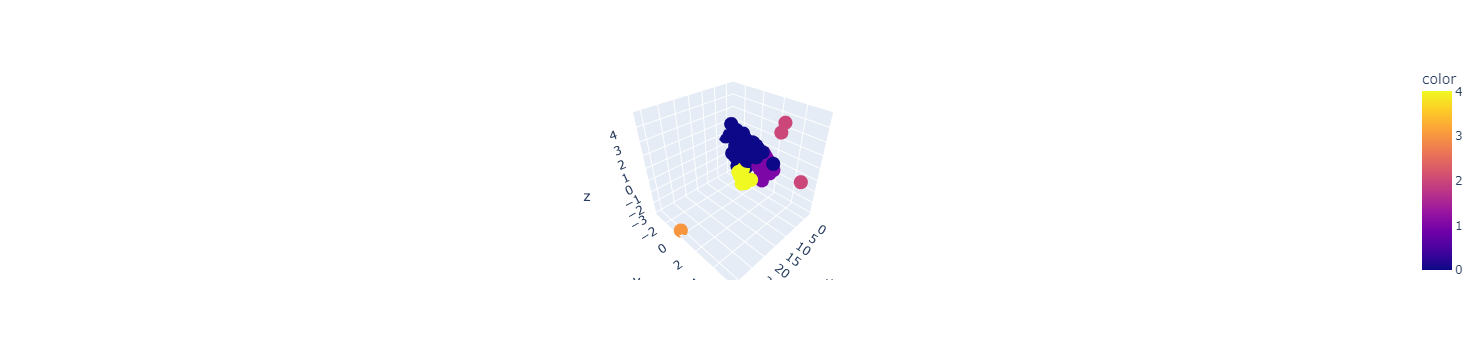

<Figure size 2100x600 with 0 Axes>

In [190]:
plt.figure(figsize = (21,6))

fig = px.scatter_3d(x=df_comp_indiv_acp.iloc[:,0], y=df_comp_indiv_acp.iloc[:,1], z=df_comp_indiv_acp.iloc[:, 2], color = df_comp_indiv_acp['cluster'])
fig.show()

#### *Commentaires 1er RUN*

#### *Commentaires 2er RUN*

### 1. KMEANS (Après ACP)
---

In [172]:
# On  récupère les composantes des individus
df_comp_indiv_acp = df_projection
df_comp_indiv_acp.sample(5)

,F1,F2,F3
pays,,,
Burkina Faso,-1.484138,1.248949,-0.724019
Sao Tomé-et-Principe,-1.636939,0.904929,-0.052721
Colombie,0.526172,0.084643,0.694298
Norvège,0.380559,-1.665667,-0.884679
Mali,-1.303339,1.156017,-0.837885


In [173]:
# Recherche pour trouver le nombre de cluster opti
# On part sur x cluster à tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [174]:
# On défini une liste vide poury stocker l'inertie des clusters
intertia = []
# On entraine kmeans en boucle pour faire des cluster de 1 à x comme défini plus haut et récupérer l'inertie de chaque cluster
for i in k_list :
  kmeans = KMeans(n_clusters=i) # On entraine kmeans sur un nombre de cluster test
  kmeans.fit(df_comp_indiv_acp) 
  intertia.append(kmeans.inertia_) # On ajoute l'inertie de chaque cluster dans une liste

C:\Users\david\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


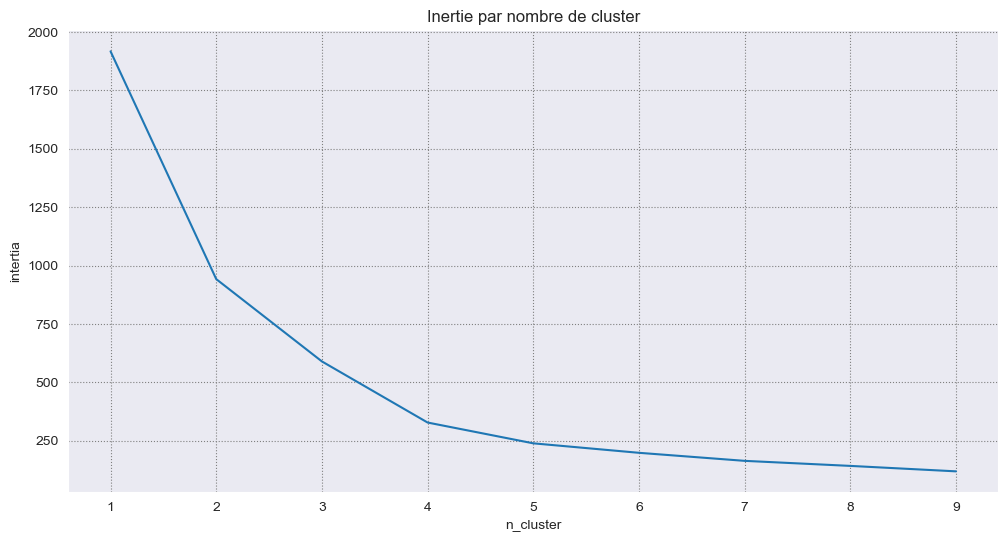

In [175]:
# On trace l'inertie par cluster (méthode du coude)
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

plt.title('Inertie par nombre de cluster')
plt.show()

In [176]:
# Calcul du score de silhouette
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

for i in k_list :
    # Instanciation de kmeans
    km = KMeans(n_clusters=i+1)

    # Entrainement sur le model
    km.fit_predict(df_comp_indiv_acp)

    # Calcul du score de silhouette
    score = silhouette_score(df_comp_indiv_acp, km.labels_, metric='euclidean')

    # Print the score
    print('Nombre cluster :', i+1, '--> Silhouette Score = %.3f' % score)

Nombre cluster : 2 --> Silhouette Score = 0.908
Nombre cluster : 3 --> Silhouette Score = 0.782
Nombre cluster : 4 --> Silhouette Score = 0.430
Nombre cluster : 5 --> Silhouette Score = 0.430
Nombre cluster : 6 --> Silhouette Score = 0.379
Nombre cluster : 7 --> Silhouette Score = 0.391
Nombre cluster : 8 --> Silhouette Score = 0.394
Nombre cluster : 9 --> Silhouette Score = 0.396
Nombre cluster : 10 --> Silhouette Score = 0.396


In [177]:
# Nombre de cluster
i = 2

# Instanciation de kmeans
km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Entrainement sur le model
km.fit_predict(df_comp_indiv_acp)

# Calcul du score de silhouette
score = silhouette_score(df_comp_indiv_acp, km.labels_, metric='euclidean')

# Résultat
print('Nombre cluster :', i, '--> Silhouette Score = %.3f' % score)

Nombre cluster : 2 --> Silhouette Score = 0.908


#### *Commentaires 1er RUN*

#### *Commentaires 2er RUN*

---
## Partie 4 - CSV Final

In [178]:
df_final

,evo_pop_(%),pib_hab_2017,dispo_total_(kcal),dispo_chicken_(kcal),dispo_total_prot_(g),dispo_chicken_prot_(g),dispo_int_total,dispo_int_chicken,prod_total,prod_chicken,imp_total,imp_chicken,alim_total,alim_chicken
pays,,,,,,,,,,,,,,
Afghanistan,1.339313,530.149831,1997.0,5.0,54.09,0.54,15139.0,57.0,11609.0,28.0,4555.0,29.0,12968.0,55.0
Afrique du Sud,1.160628,6723.928582,2987.0,143.0,83.36,14.11,66840.0,2118.0,68455.0,1667.0,9020.0,514.0,31726.0,2035.0
Albanie,0.950617,4521.752219,3400.0,85.0,119.50,6.26,4879.0,47.0,4231.0,13.0,884.0,38.0,3631.0,47.0
Algérie,1.211380,4134.936054,3345.0,22.0,92.85,1.97,45365.0,277.0,26763.0,275.0,19718.0,2.0,33056.0,264.0
Allemagne,1.016986,44670.222288,3559.0,71.0,104.07,7.96,174960.0,1739.0,167828.0,1514.0,66550.0,842.0,77988.0,1609.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1.537924,42522.377622,3370.0,147.0,107.26,14.80,11795.0,412.0,1793.0,48.0,14986.0,433.0,5958.0,412.0
Équateur,1.174084,6246.404252,2585.0,83.0,65.77,6.15,23810.0,341.0,30843.0,340.0,2134.0,0.0,9465.0,324.0
États-Unis d'Amérique,1.081423,59059.596403,3762.0,219.0,113.61,19.93,849821.0,18266.0,974034.0,21914.0,84507.0,123.0,322036.0,18100.0


# FIN